# goals
* explore the mismatch between lensed, RP and NP waveforms
* explore the conditions for indistinguishable waveforms

# import modules

In [14]:
from modules.Classes_ver1 import *
from modules.default_params_ver1 import *
from modules.functions_ver1_draft import *

# assign params

default: mcz = 20 solar masses, MLz = 2000 solar masses

In [15]:
# lens_params_1, RP_params_1, NP_params_1 = set_to_location(loc_params['sys1']['edgeon'], lens_params_0, RP_params_0, NP_params_0)
# lens_params_1["mcz"] = RP_params_1["mcz"] = NP_params_1["mcz"] = 20 * solar_mass
# lens_params_1["MLz"] = 2000 * solar_mass
# lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

In [16]:
test_loc_params = {"phi_S": np.pi/4, "theta_S": np.pi/2, "phi_J": np.pi/3, "theta_J": np.pi/6}
print(cos_i_JN(test_loc_params["phi_S"], test_loc_params["theta_S"], test_loc_params["phi_J"], test_loc_params["theta_J"]))

lens_params_1, RP_params_1, NP_params_1 = set_to_location(test_loc_params, lens_params_0, RP_params_0, NP_params_0)
lens_params_1["mcz"] = RP_params_1["mcz"] = NP_params_1["mcz"] = 20 * solar_mass
lens_params_1["MLz"] = 2000 * solar_mass
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

order of arguments: phi_S, theta_S, phi_J, theta_J
0.48296291314453416


# lensing

Text(0.5, 1.0, 'Phase Difference')

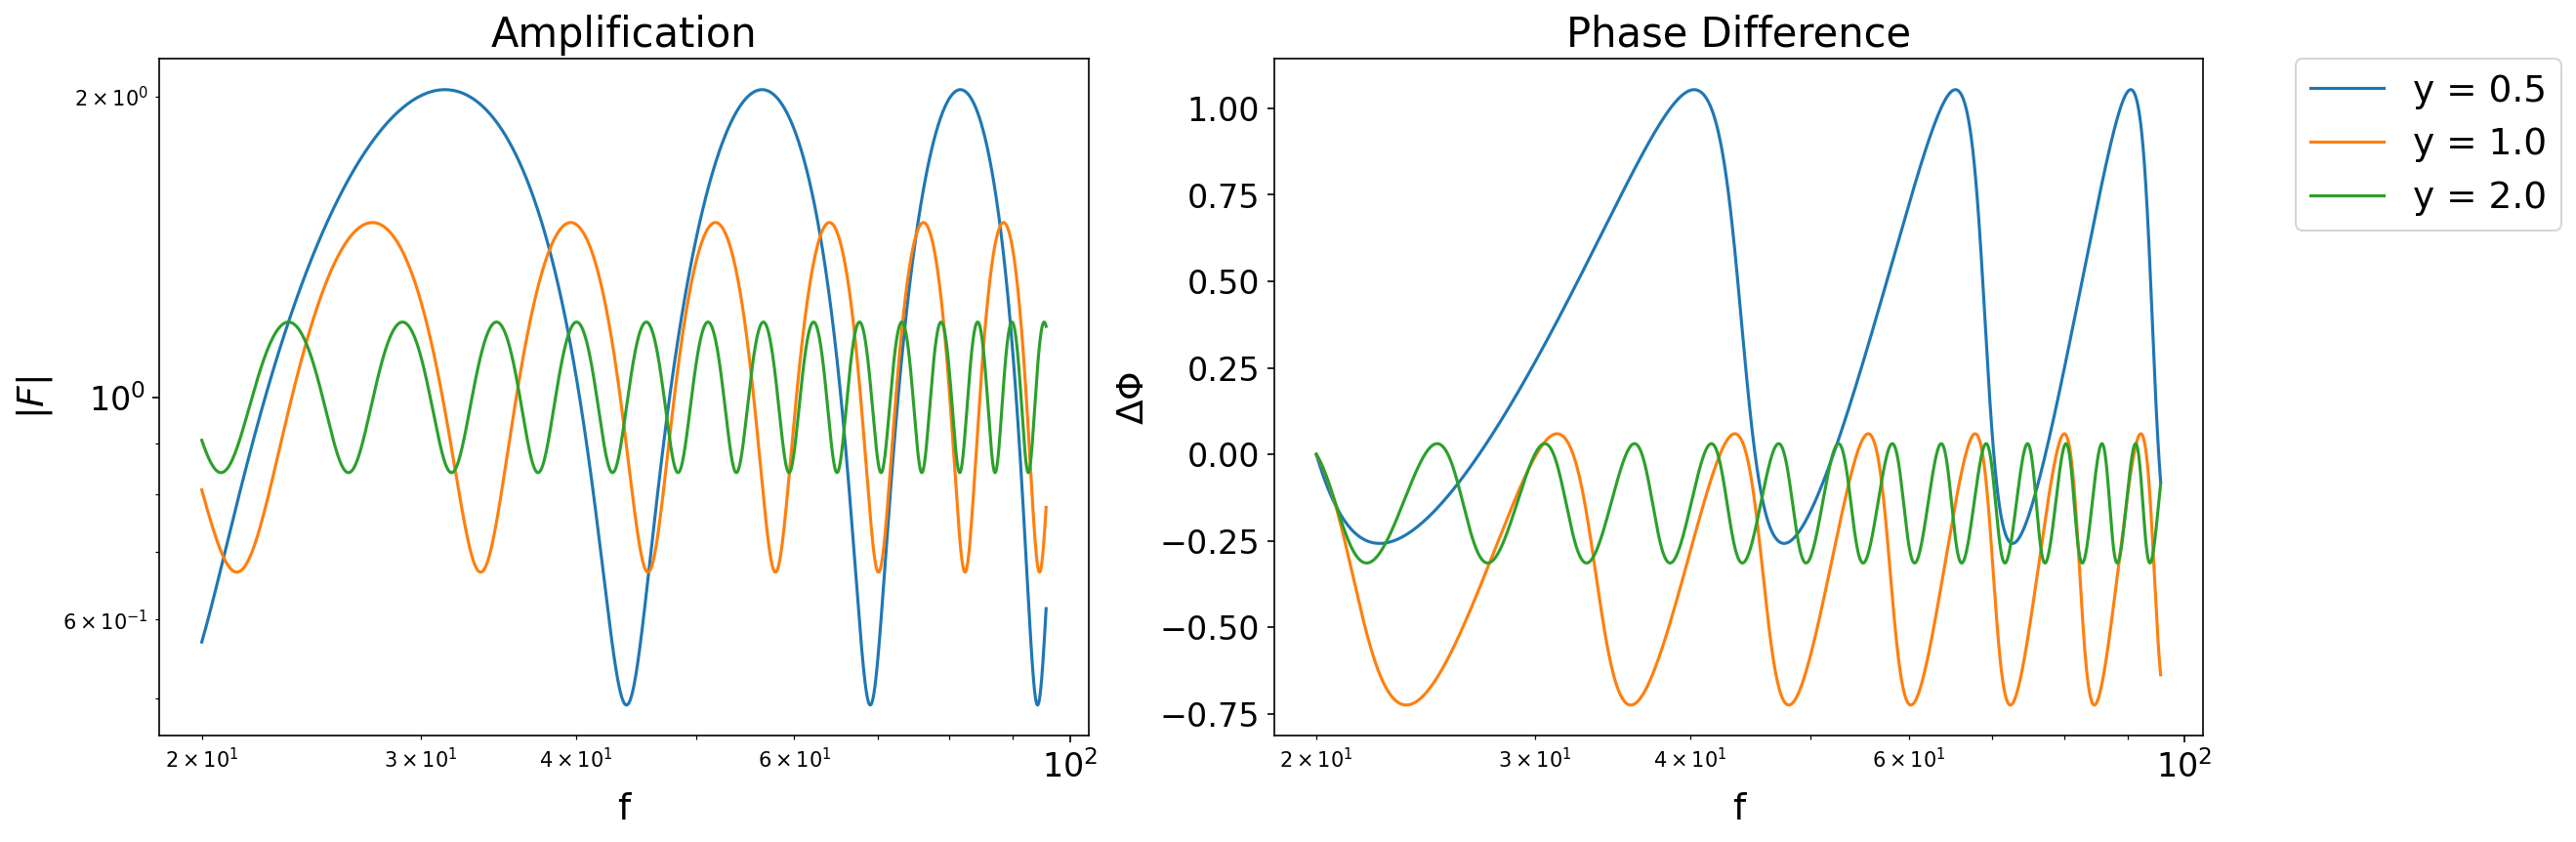

In [36]:
# plot amplification and phase diff for different values of y side by side
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0].loglog(f_range, np.abs(amp_fact), label="y = {}".format(y))
    axes[1].plot(f_range, phase_diff, label="y = {}".format(y))

axes[0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=18)
axes[0].set_xlabel("f", fontsize=18)
axes[0].set_ylabel(r"$|F|$", fontsize=18)
axes[0].tick_params(axis="both", which="major", labelsize=16)
axes[0].set_title("Amplification", fontsize=20)

axes[1].set_xscale("log")
axes[1].set_xlabel("f", fontsize=18)
axes[1].set_ylabel(r"$\Delta \Phi$", fontsize=18)
axes[1].tick_params(axis="both", which="major", labelsize=16)
axes[1].set_title("Phase Difference", fontsize=20)

Text(0.5, 1.0, 'Phase Difference')

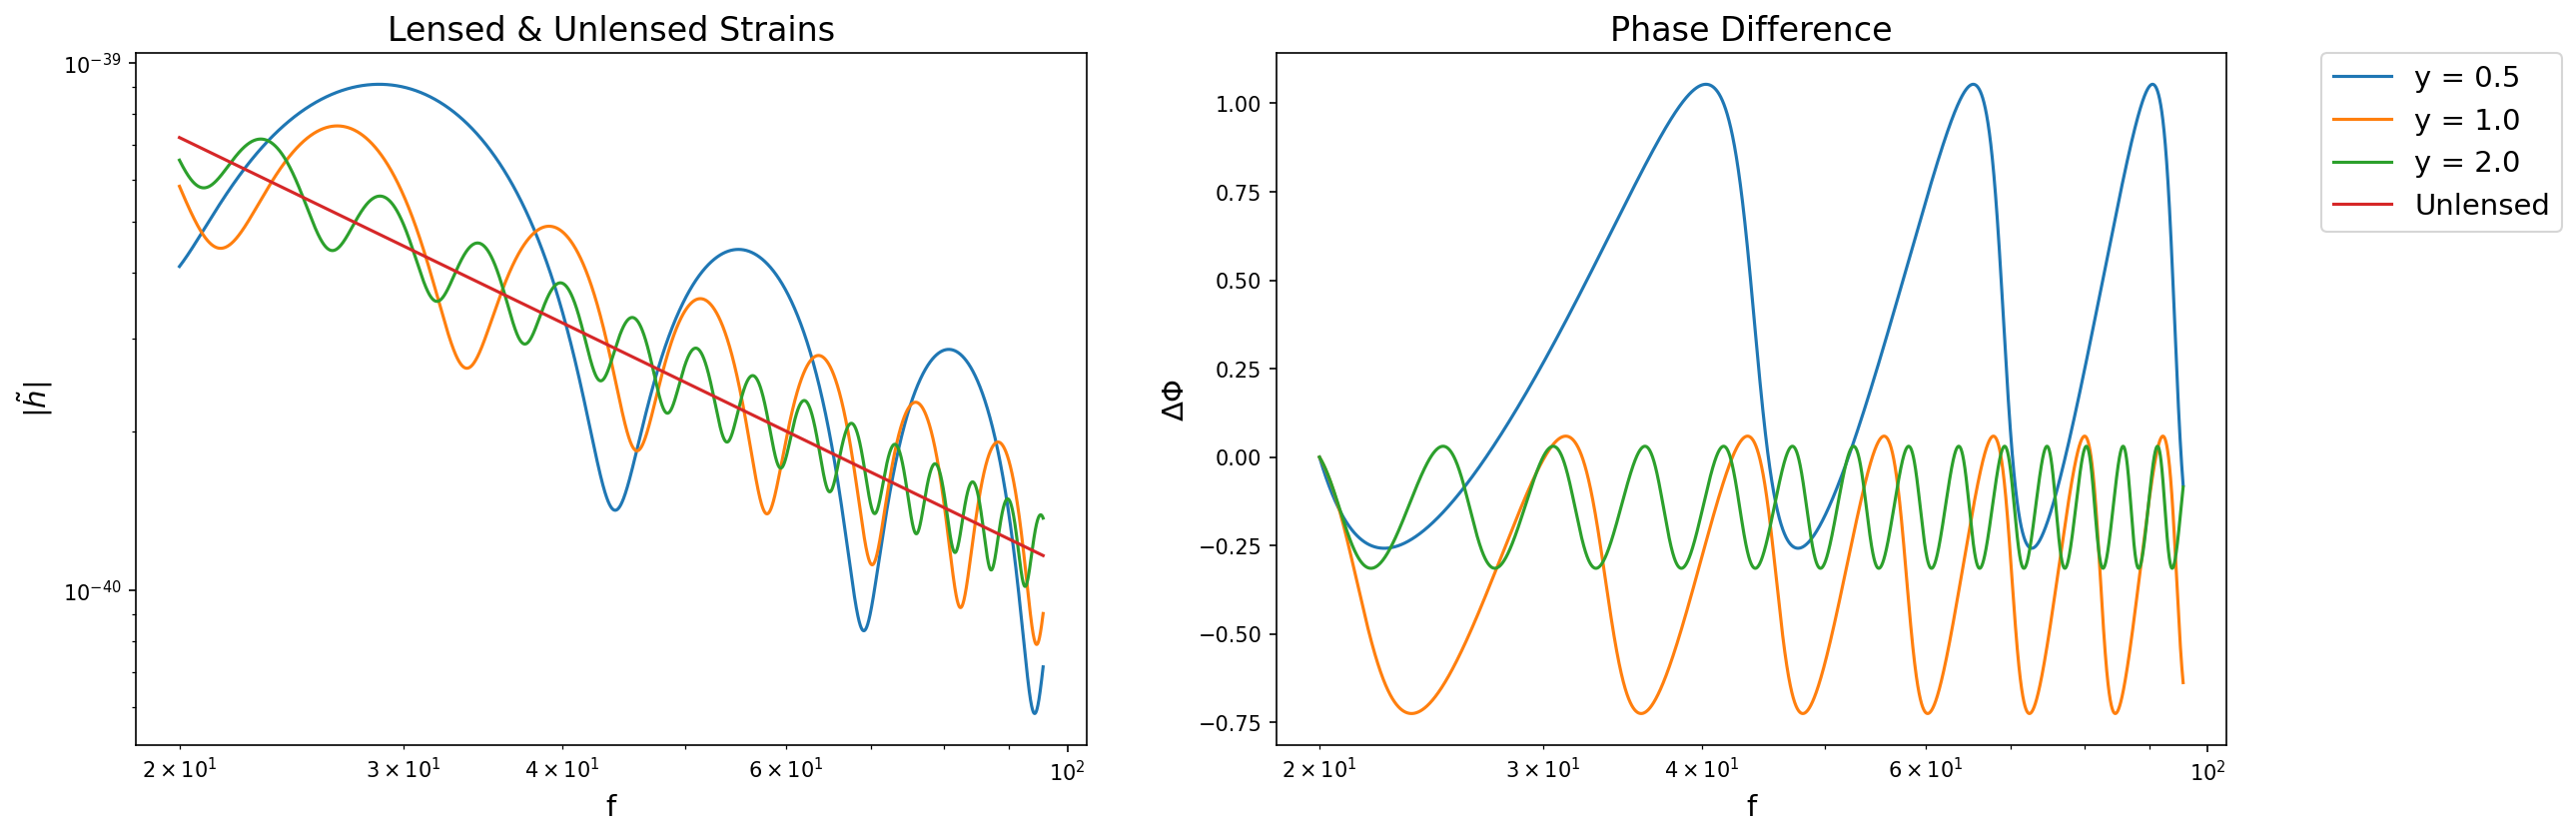

In [37]:
# plot strain and phase diff for different values of y side by side
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0].loglog(f_range, np.abs(lensed_strain), label="y = {}".format(y))
    axes[1].plot(f_range, phase_diff, label="y = {}".format(y))

axes[0].loglog(f_range, np.abs(unlensed_strain), label="Unlensed")
axes[0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=14)
axes[0].set_xlabel("f", fontsize=14)
axes[0].set_ylabel(r"$|\~{h}|$", fontsize=14)
axes[0].set_title("Lensed & Unlensed Strains", fontsize=16)

axes[1].set_xscale("log")
axes[1].set_xlabel("f", fontsize=14)
axes[1].set_ylabel(r"$\Delta \Phi$", fontsize=14)
axes[1].set_title("Phase Difference", fontsize=16)

Text(0.5, 1.0, 'Phase Difference')

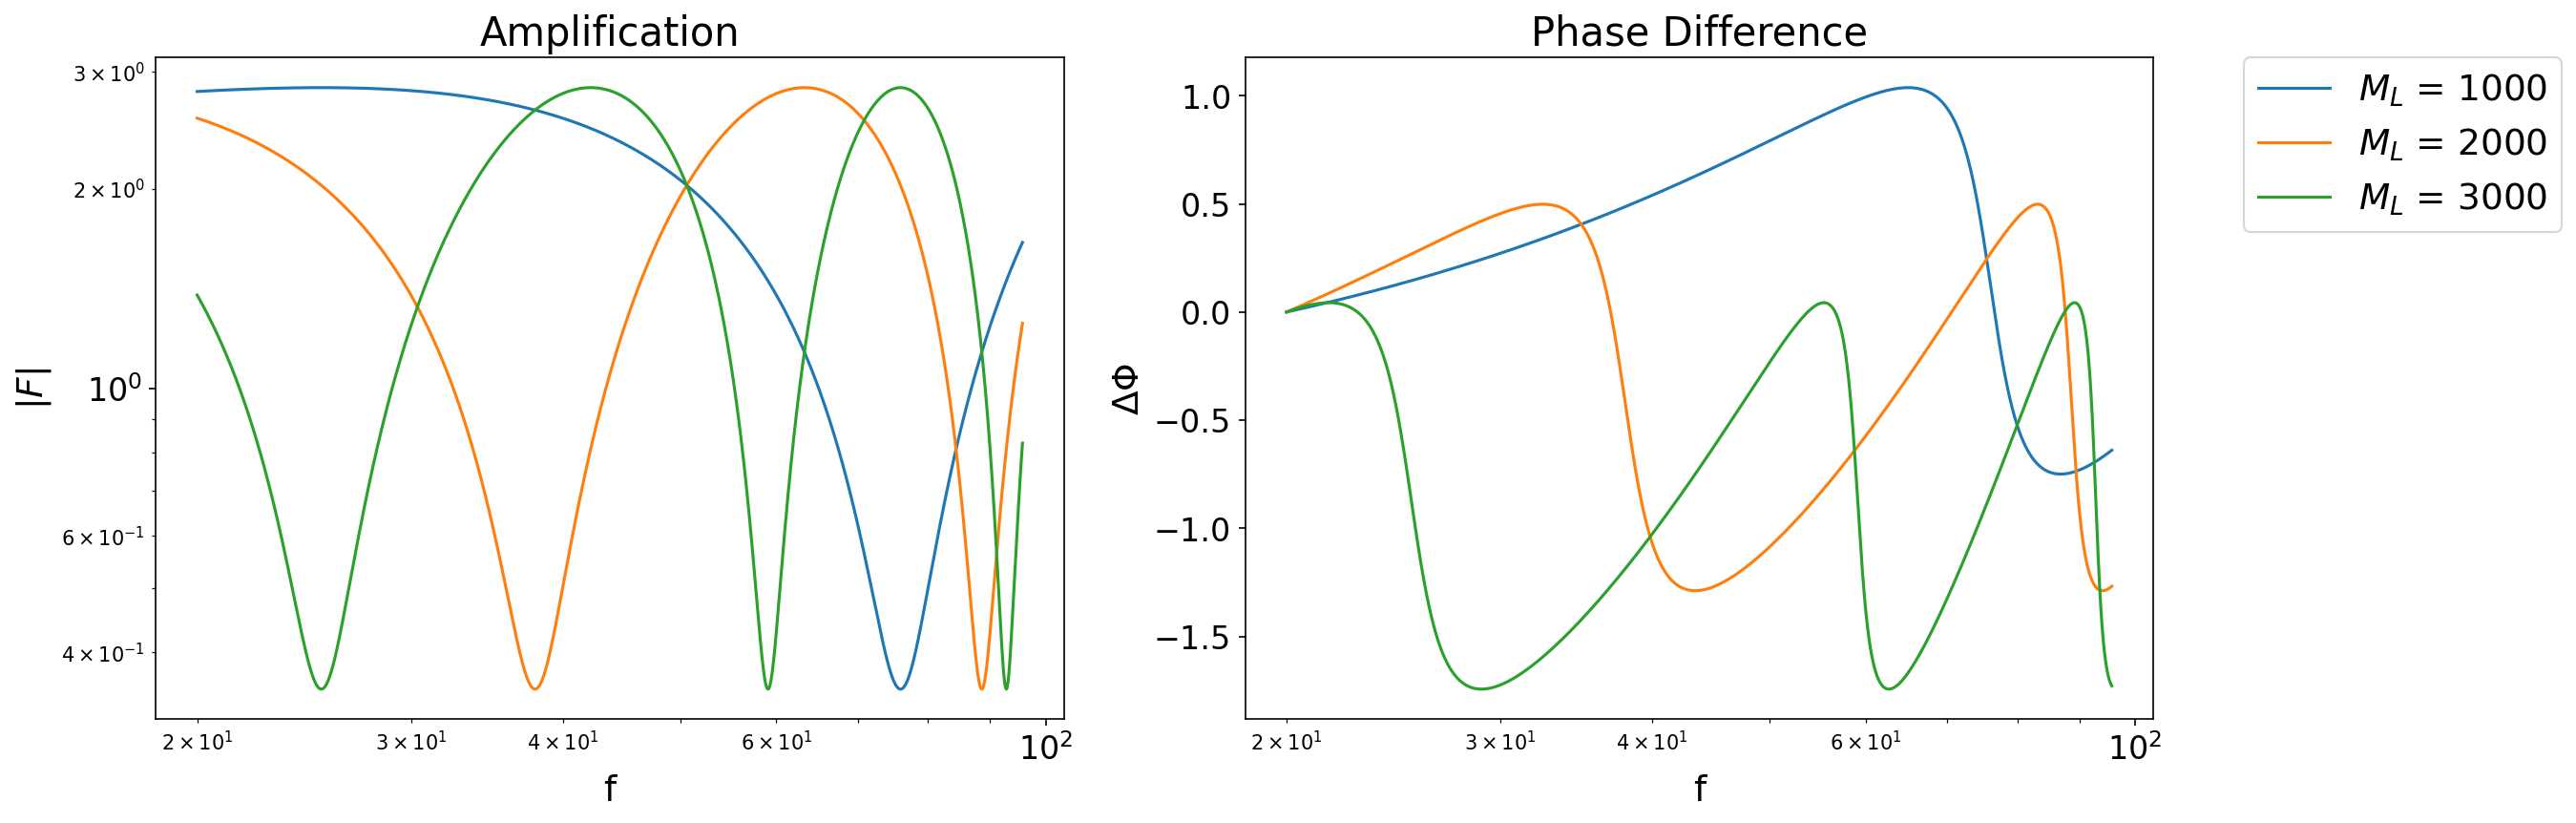

In [38]:
# plot amplification and phase diff for different values of MLz side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0].loglog(f_range, np.abs(amp_fact), label="$M_L$ = {:.4g}".format(MLz))
    axes[1].plot(f_range, phase_diff, label="$M_L$ = {:.4g}".format(MLz))

axes[0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=18)
axes[0].set_xlabel("f", fontsize=18)
axes[0].set_ylabel(r"$|F|$", fontsize=18)
axes[0].tick_params(axis="both", which="major", labelsize=16)
axes[0].set_title("Amplification", fontsize=20)

axes[1].set_xscale("log")
axes[1].set_xlabel("f", fontsize=18)
axes[1].set_ylabel(r"$\Delta \Phi$", fontsize=18)
axes[1].tick_params(axis="both", which="major", labelsize=16)
axes[1].set_title("Phase Difference", fontsize=20)

Text(0.5, 1.0, 'Phase Difference')

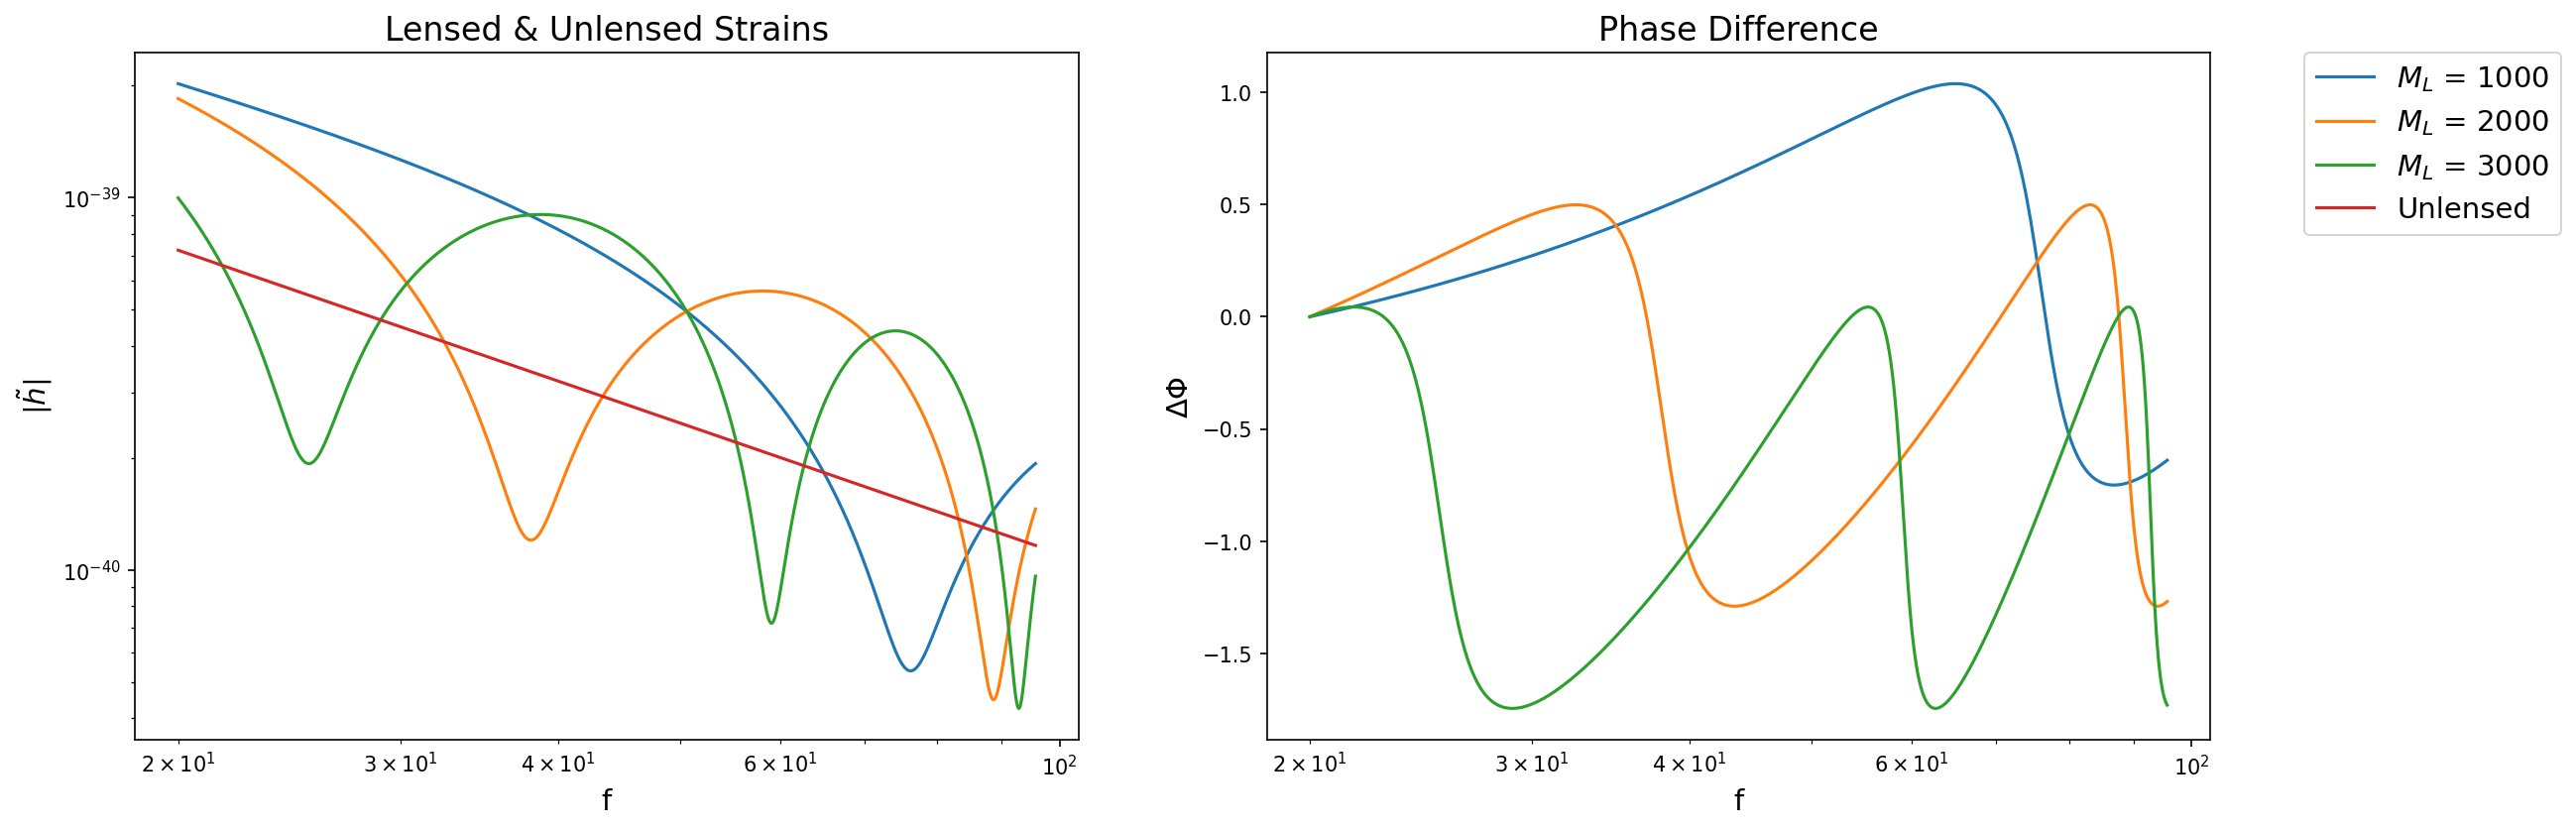

In [39]:
# similar plot for different values of MLz
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0].loglog(f_range, np.abs(lensed_strain), label="$M_L$ = {:.4g}".format(MLz))
    axes[1].plot(f_range, phase_diff, label="$M_L$ = {:.4g}".format(MLz))
    
axes[0].loglog(f_range, np.abs(unlensed_strain), label="Unlensed")
axes[0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=14)
axes[0].set_xlabel("f", fontsize=14)
axes[0].set_ylabel(r"$|\~{h}|$", fontsize=14)
axes[0].set_title("Lensed & Unlensed Strains", fontsize=16)

axes[1].set_xscale("log")
axes[1].set_xlabel("f", fontsize=14)
axes[1].set_ylabel(r"$\Delta \Phi$", fontsize=14)
axes[1].set_title("Phase Difference", fontsize=16)

Text(0.5, 0.5, '$\\Delta \\Phi$')

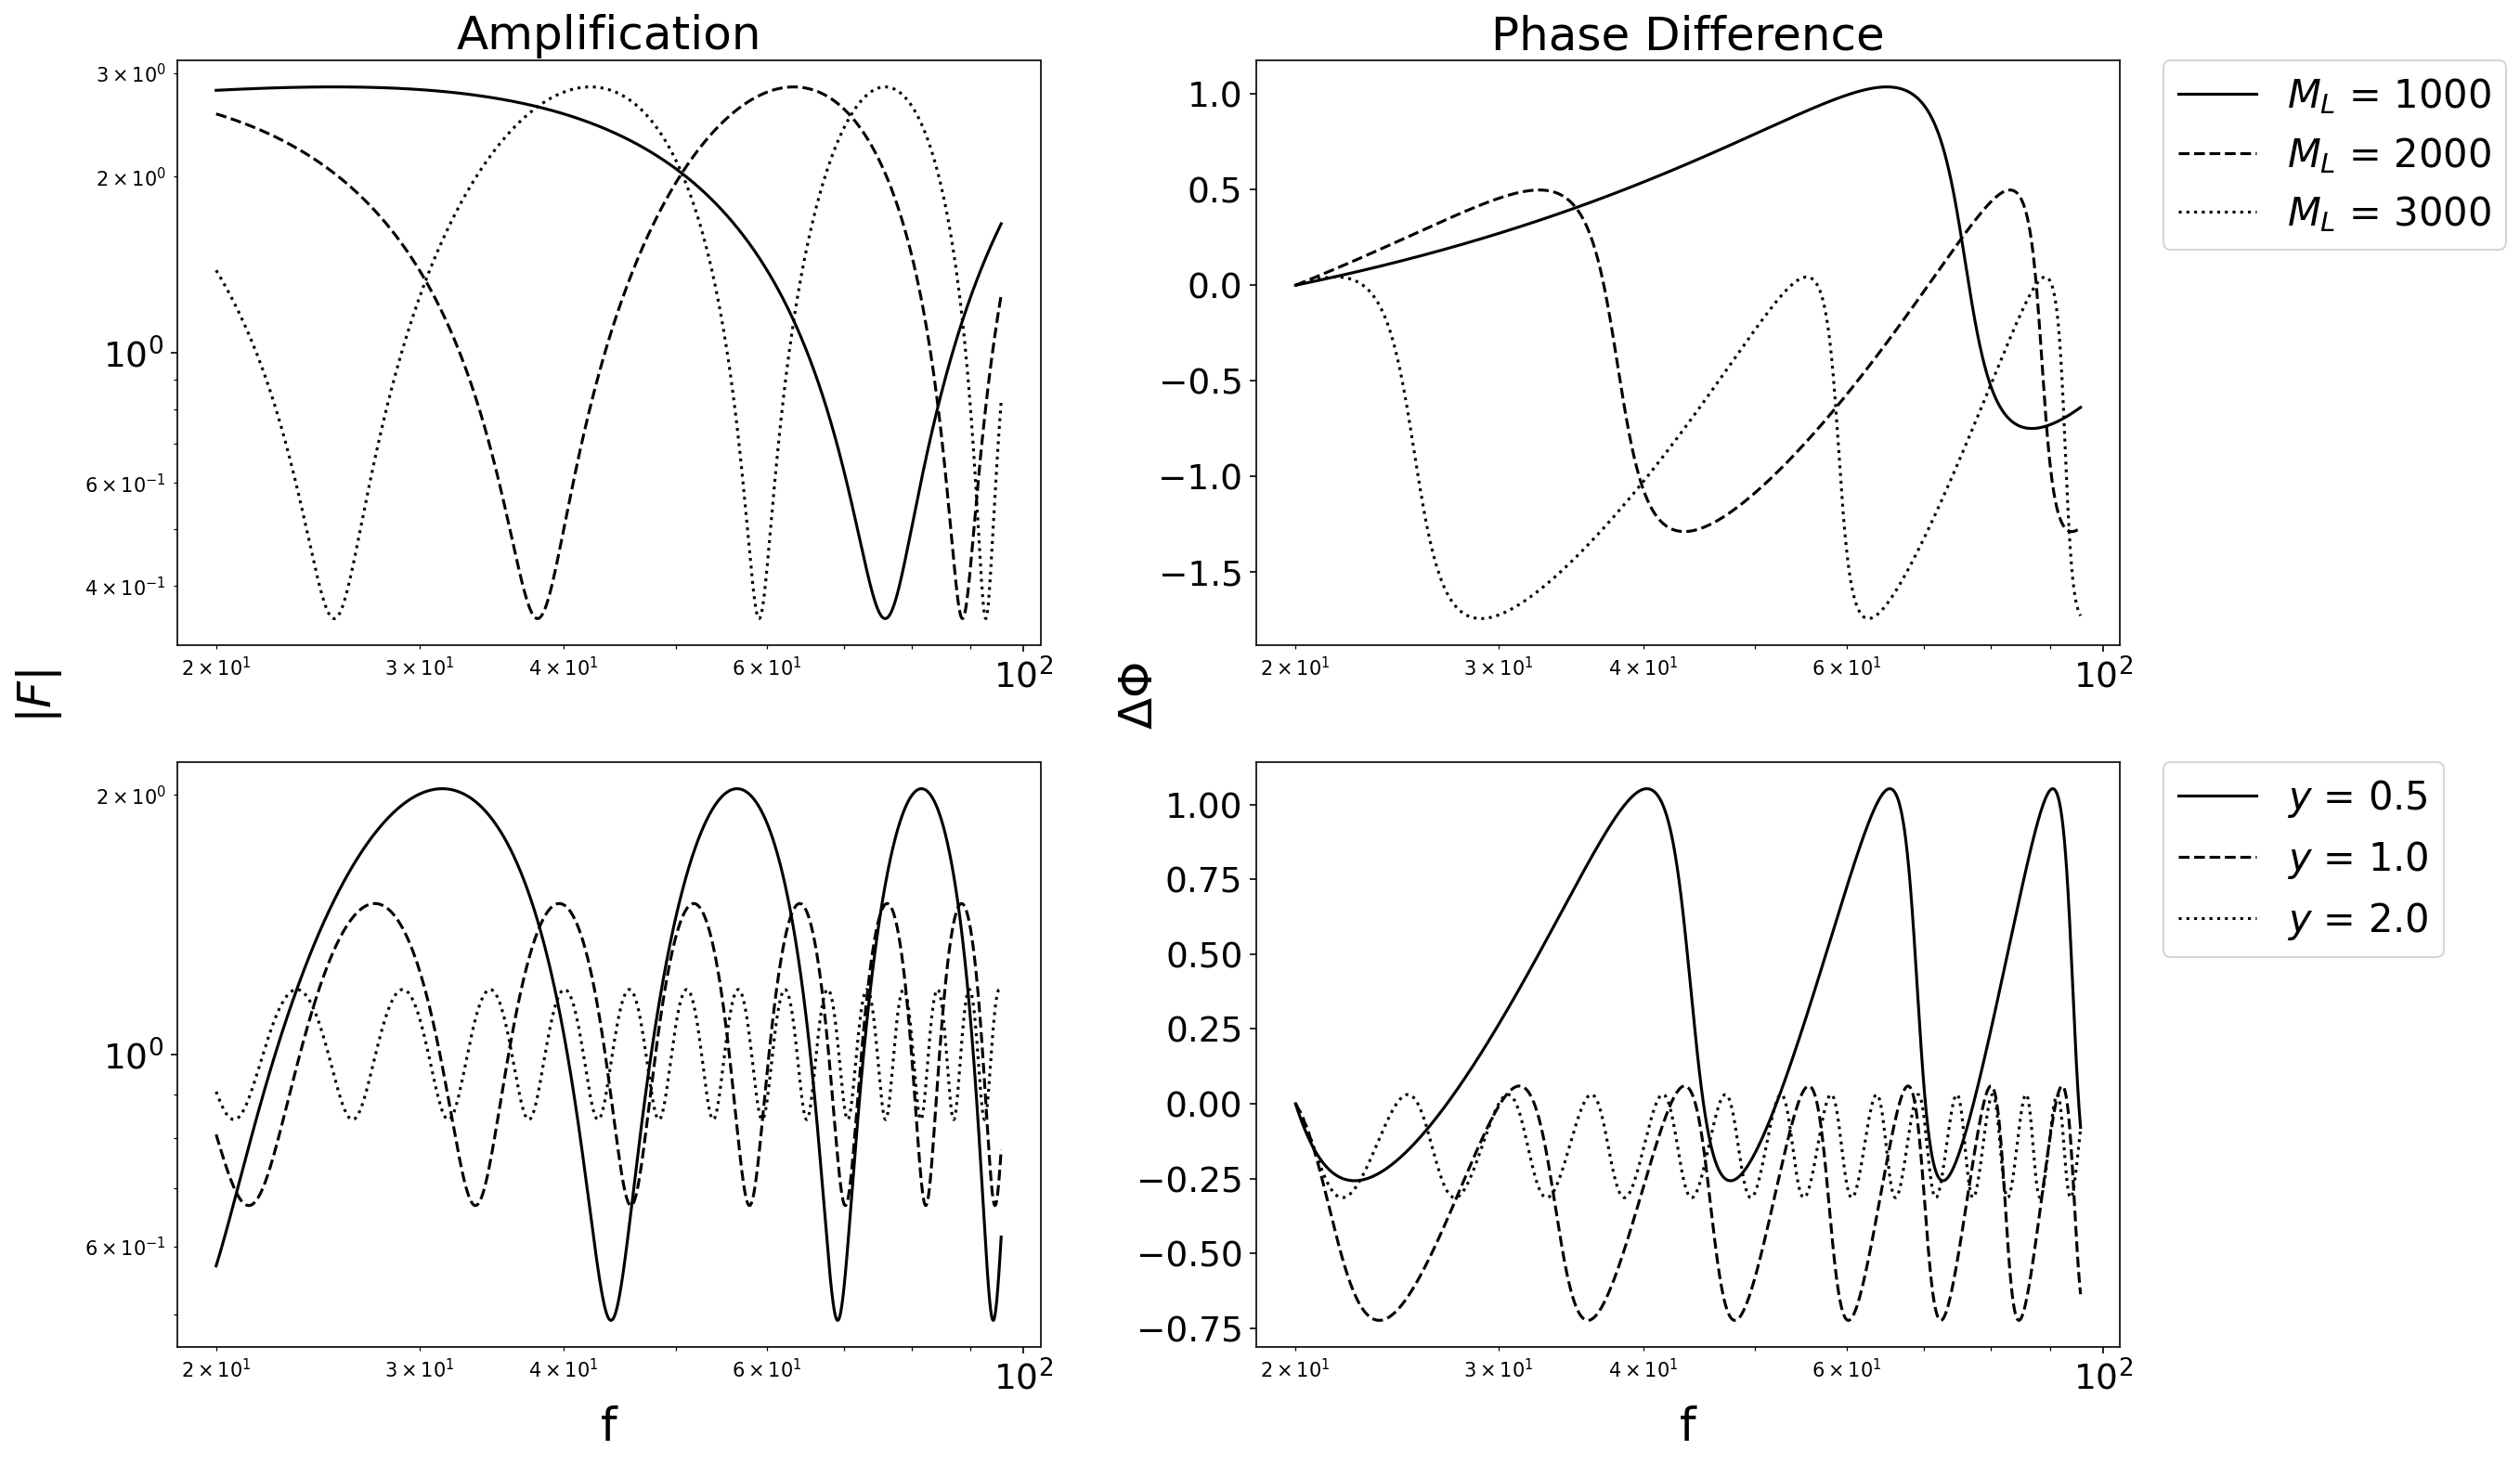

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of MLz side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ['-', '--', ':']  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].loglog(f_range, np.abs(amp_fact), linestyle=line_styles[i], color='black', label="$M_L$ = {:.4g}".format(MLz))
    axes[0, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label="$M_L$ = {:.4g}".format(MLz))

axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Amplification", fontsize=24)

axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of y side by side
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])
line_styles = ['-', '--', ':']  # Define the line styles

for i, y in enumerate(y_range):
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].loglog(f_range, np.abs(amp_fact), linestyle=line_styles[i], color='black', label="$y$ = {}".format(y))
    axes[1, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label="$y$ = {}".format(y))

axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|F|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.50, 0.5, r"$\Delta \Phi$", va="center", rotation="vertical", fontsize=24)

Text(0.49, 0.5, '$\\Phi_L - \\Phi_{UL}$ (rad)')

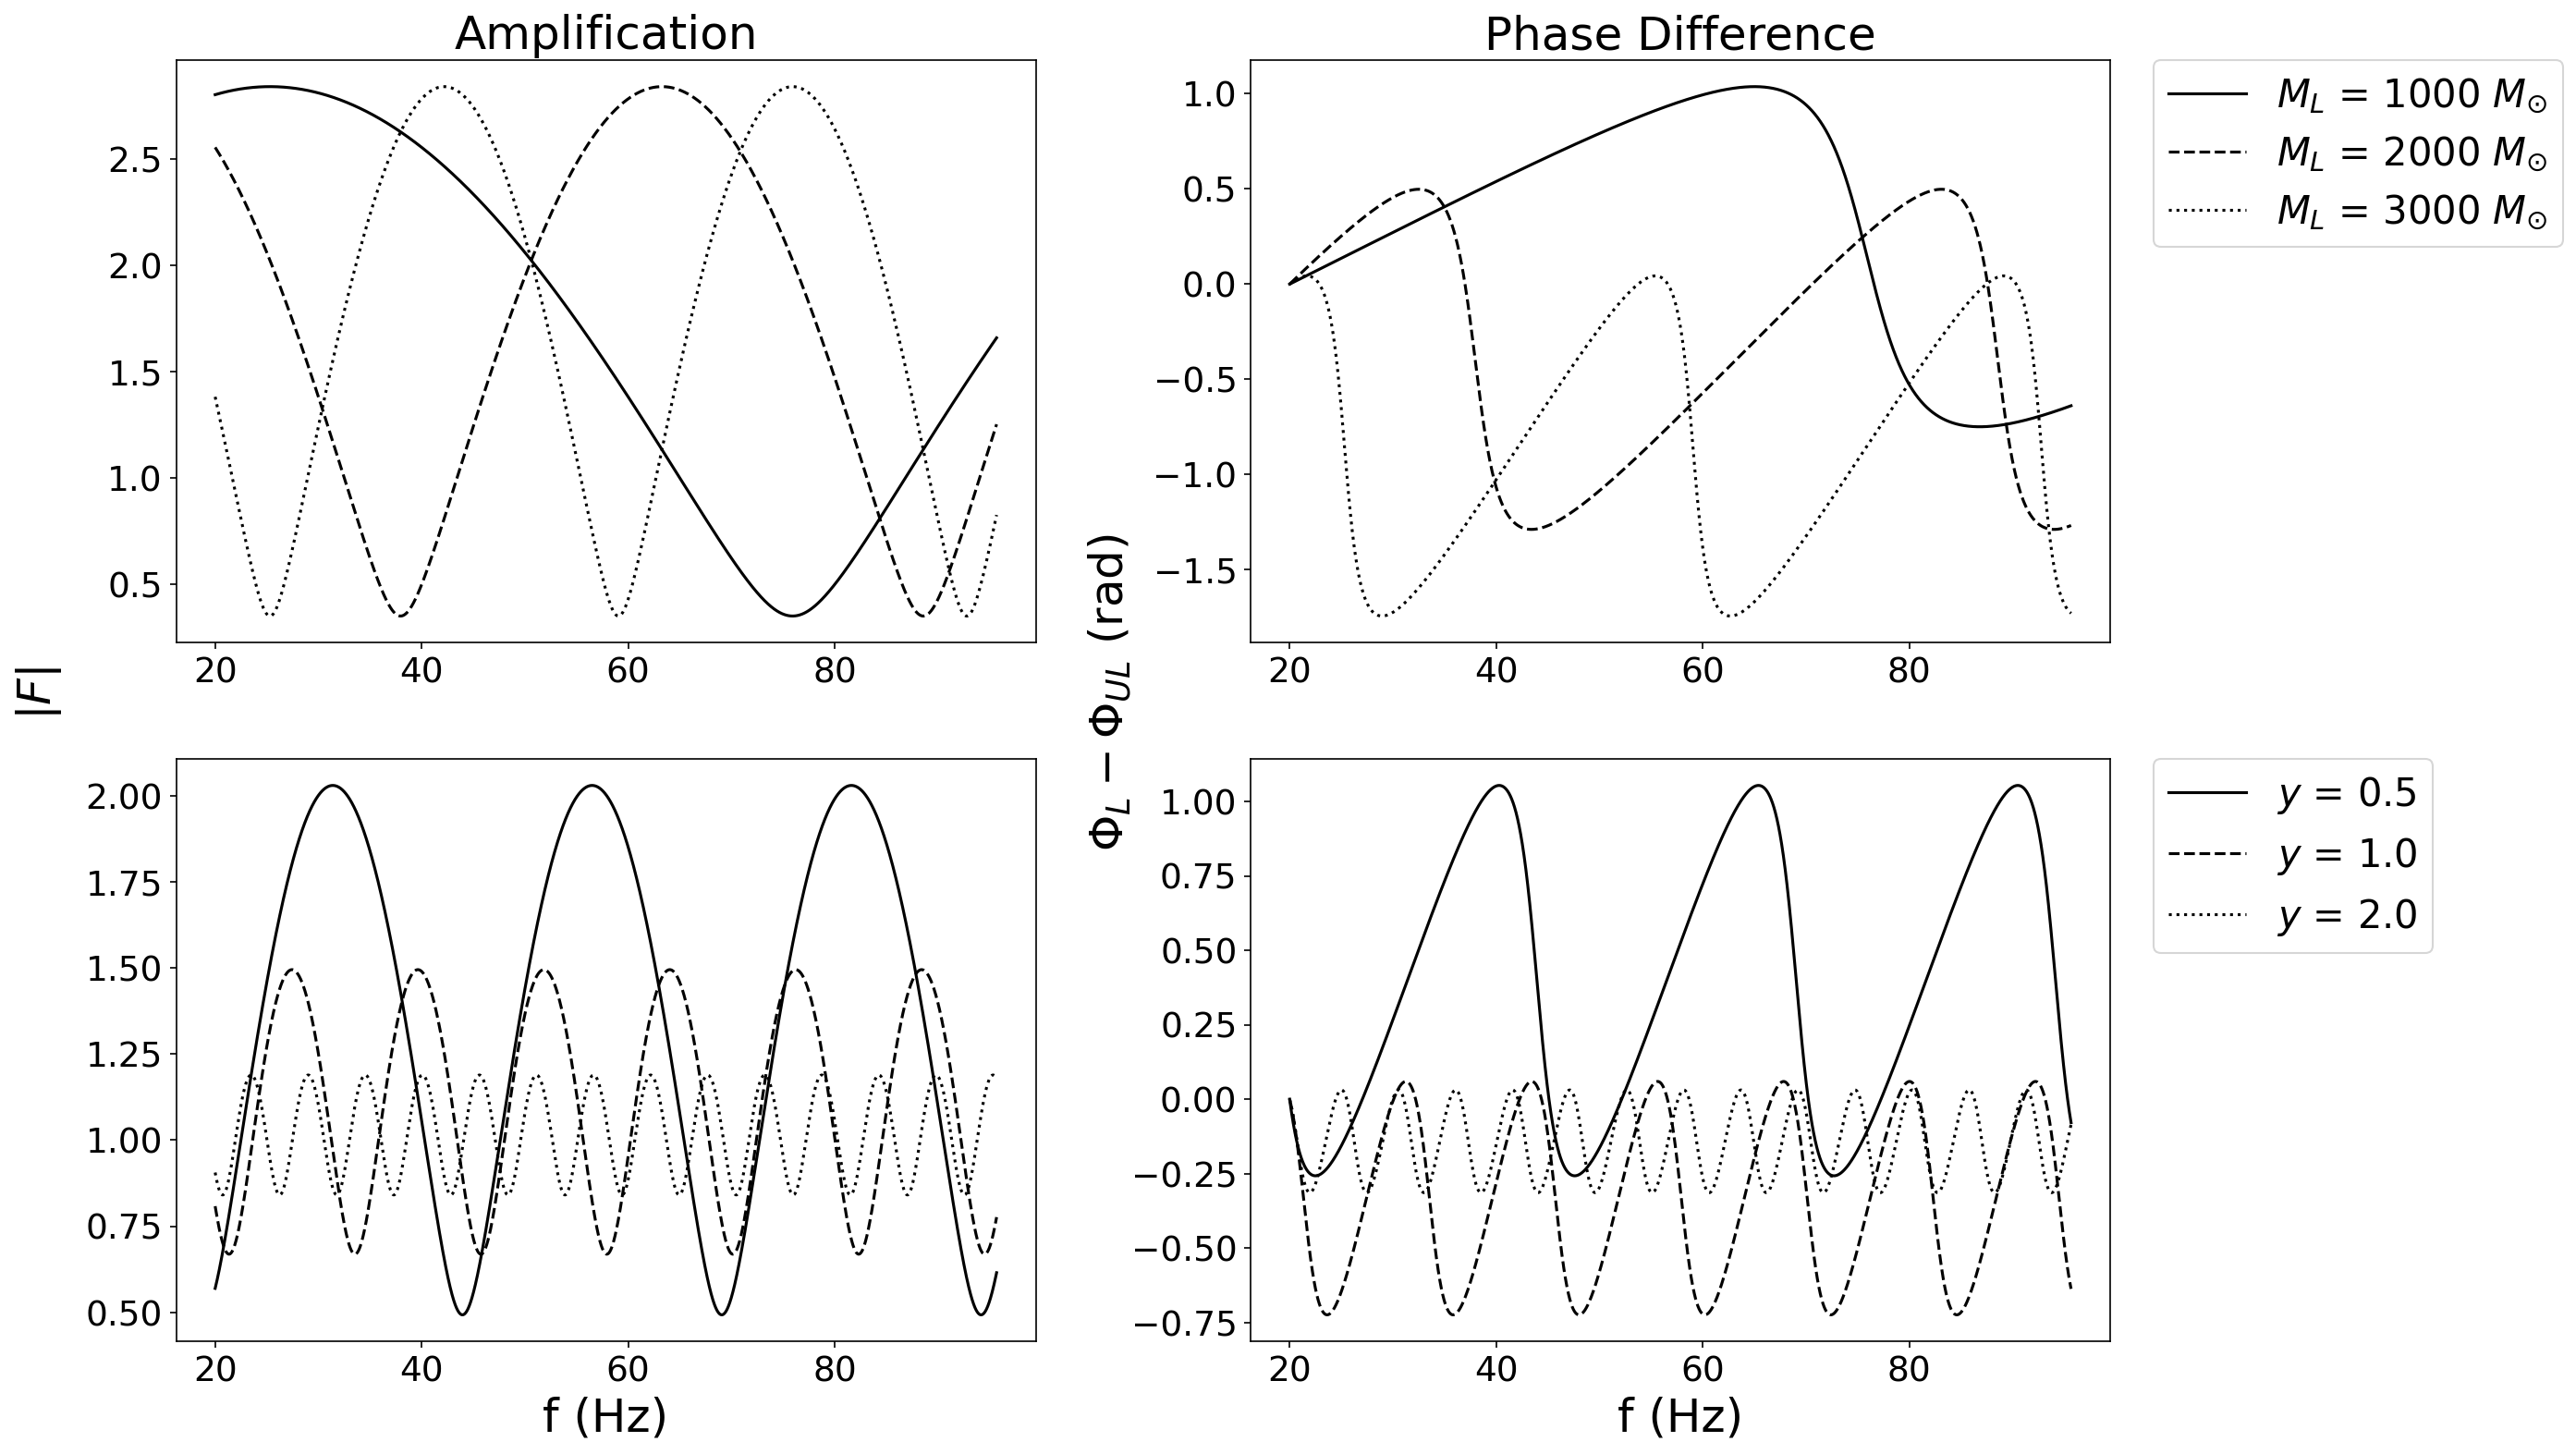

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of MLz side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ['-', '--', ':']  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(f_range, np.abs(amp_fact), linestyle=line_styles[i], color='black', label="$M_L$ = {:.4g} {}".format(MLz, r"$M_{\odot}$"))
    axes[0, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label="$M_L$ = {:.4g} {}".format(MLz, r"$M_{\odot}$"))

axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Amplification", fontsize=24)

# axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of y side by side
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])
line_styles = ['-', '--', ':']  # Define the line styles

for i, y in enumerate(y_range):
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(f_range, np.abs(amp_fact), linestyle=line_styles[i], color='black', label="$y$ = {}".format(y))
    axes[1, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label="$y$ = {}".format(y))

axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|F|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.49, 0.5, r"$\Phi_L - \Phi_{UL}$ (rad)", va="center", rotation="vertical", fontsize=24)

Text(0.49, 0.5, '$\\Phi_L - \\Phi_{UL}$ (rad)')

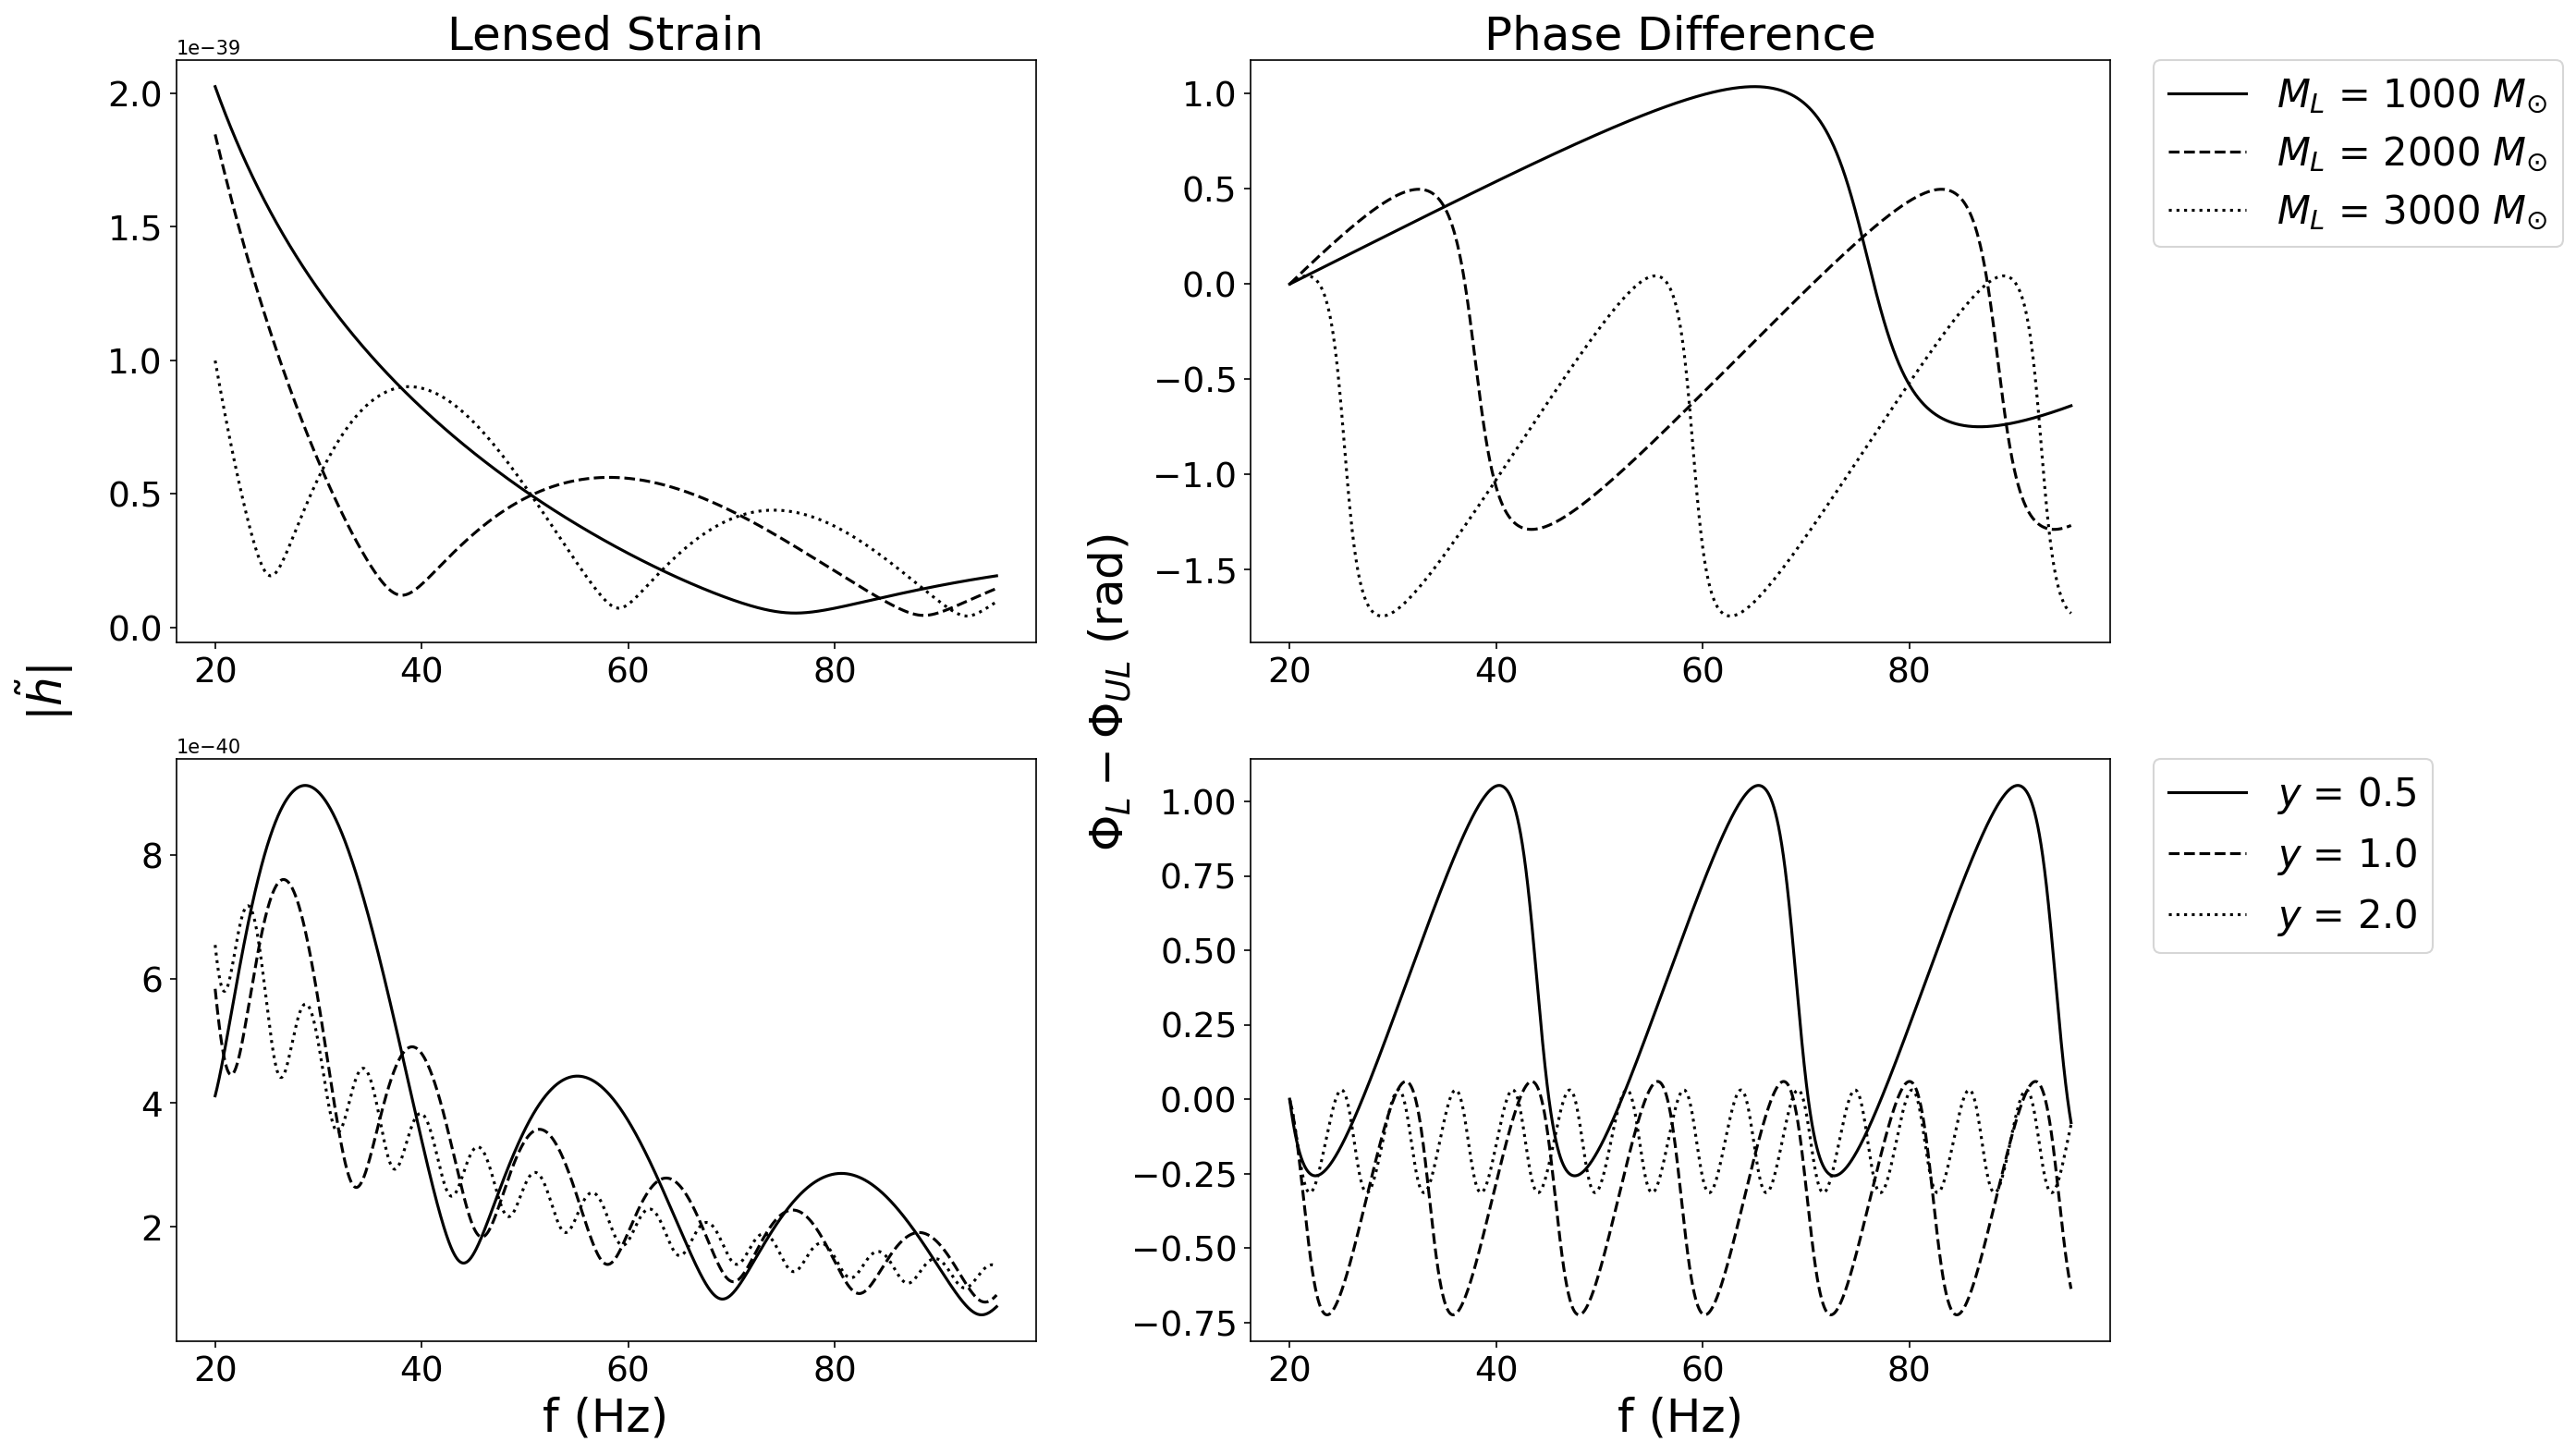

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of MLz side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ['-', '--', ':']  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(f_range, np.abs(lensed_strain), linestyle=line_styles[i], color='black', label="$M_L$ = {:.4g} {}".format(MLz, r"$M_{\odot}$"))
    axes[0, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label="$M_L$ = {:.4g} {}".format(MLz, r"$M_{\odot}$"))

axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Lensed Strain", fontsize=24)

# axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of y side by side
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])
line_styles = ['-', '--', ':']  # Define the line styles

for i, y in enumerate(y_range):
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(f_range, np.abs(lensed_strain), linestyle=line_styles[i], color='black', label="$y$ = {}".format(y))
    axes[1, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label="$y$ = {}".format(y))

axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.49, 0.5, r"$\Phi_L - \Phi_{UL}$ (rad)", va="center", rotation="vertical", fontsize=24)

Text(0.49, 0.5, '$\\Phi_L - \\Phi_{UL}$ (rad)')

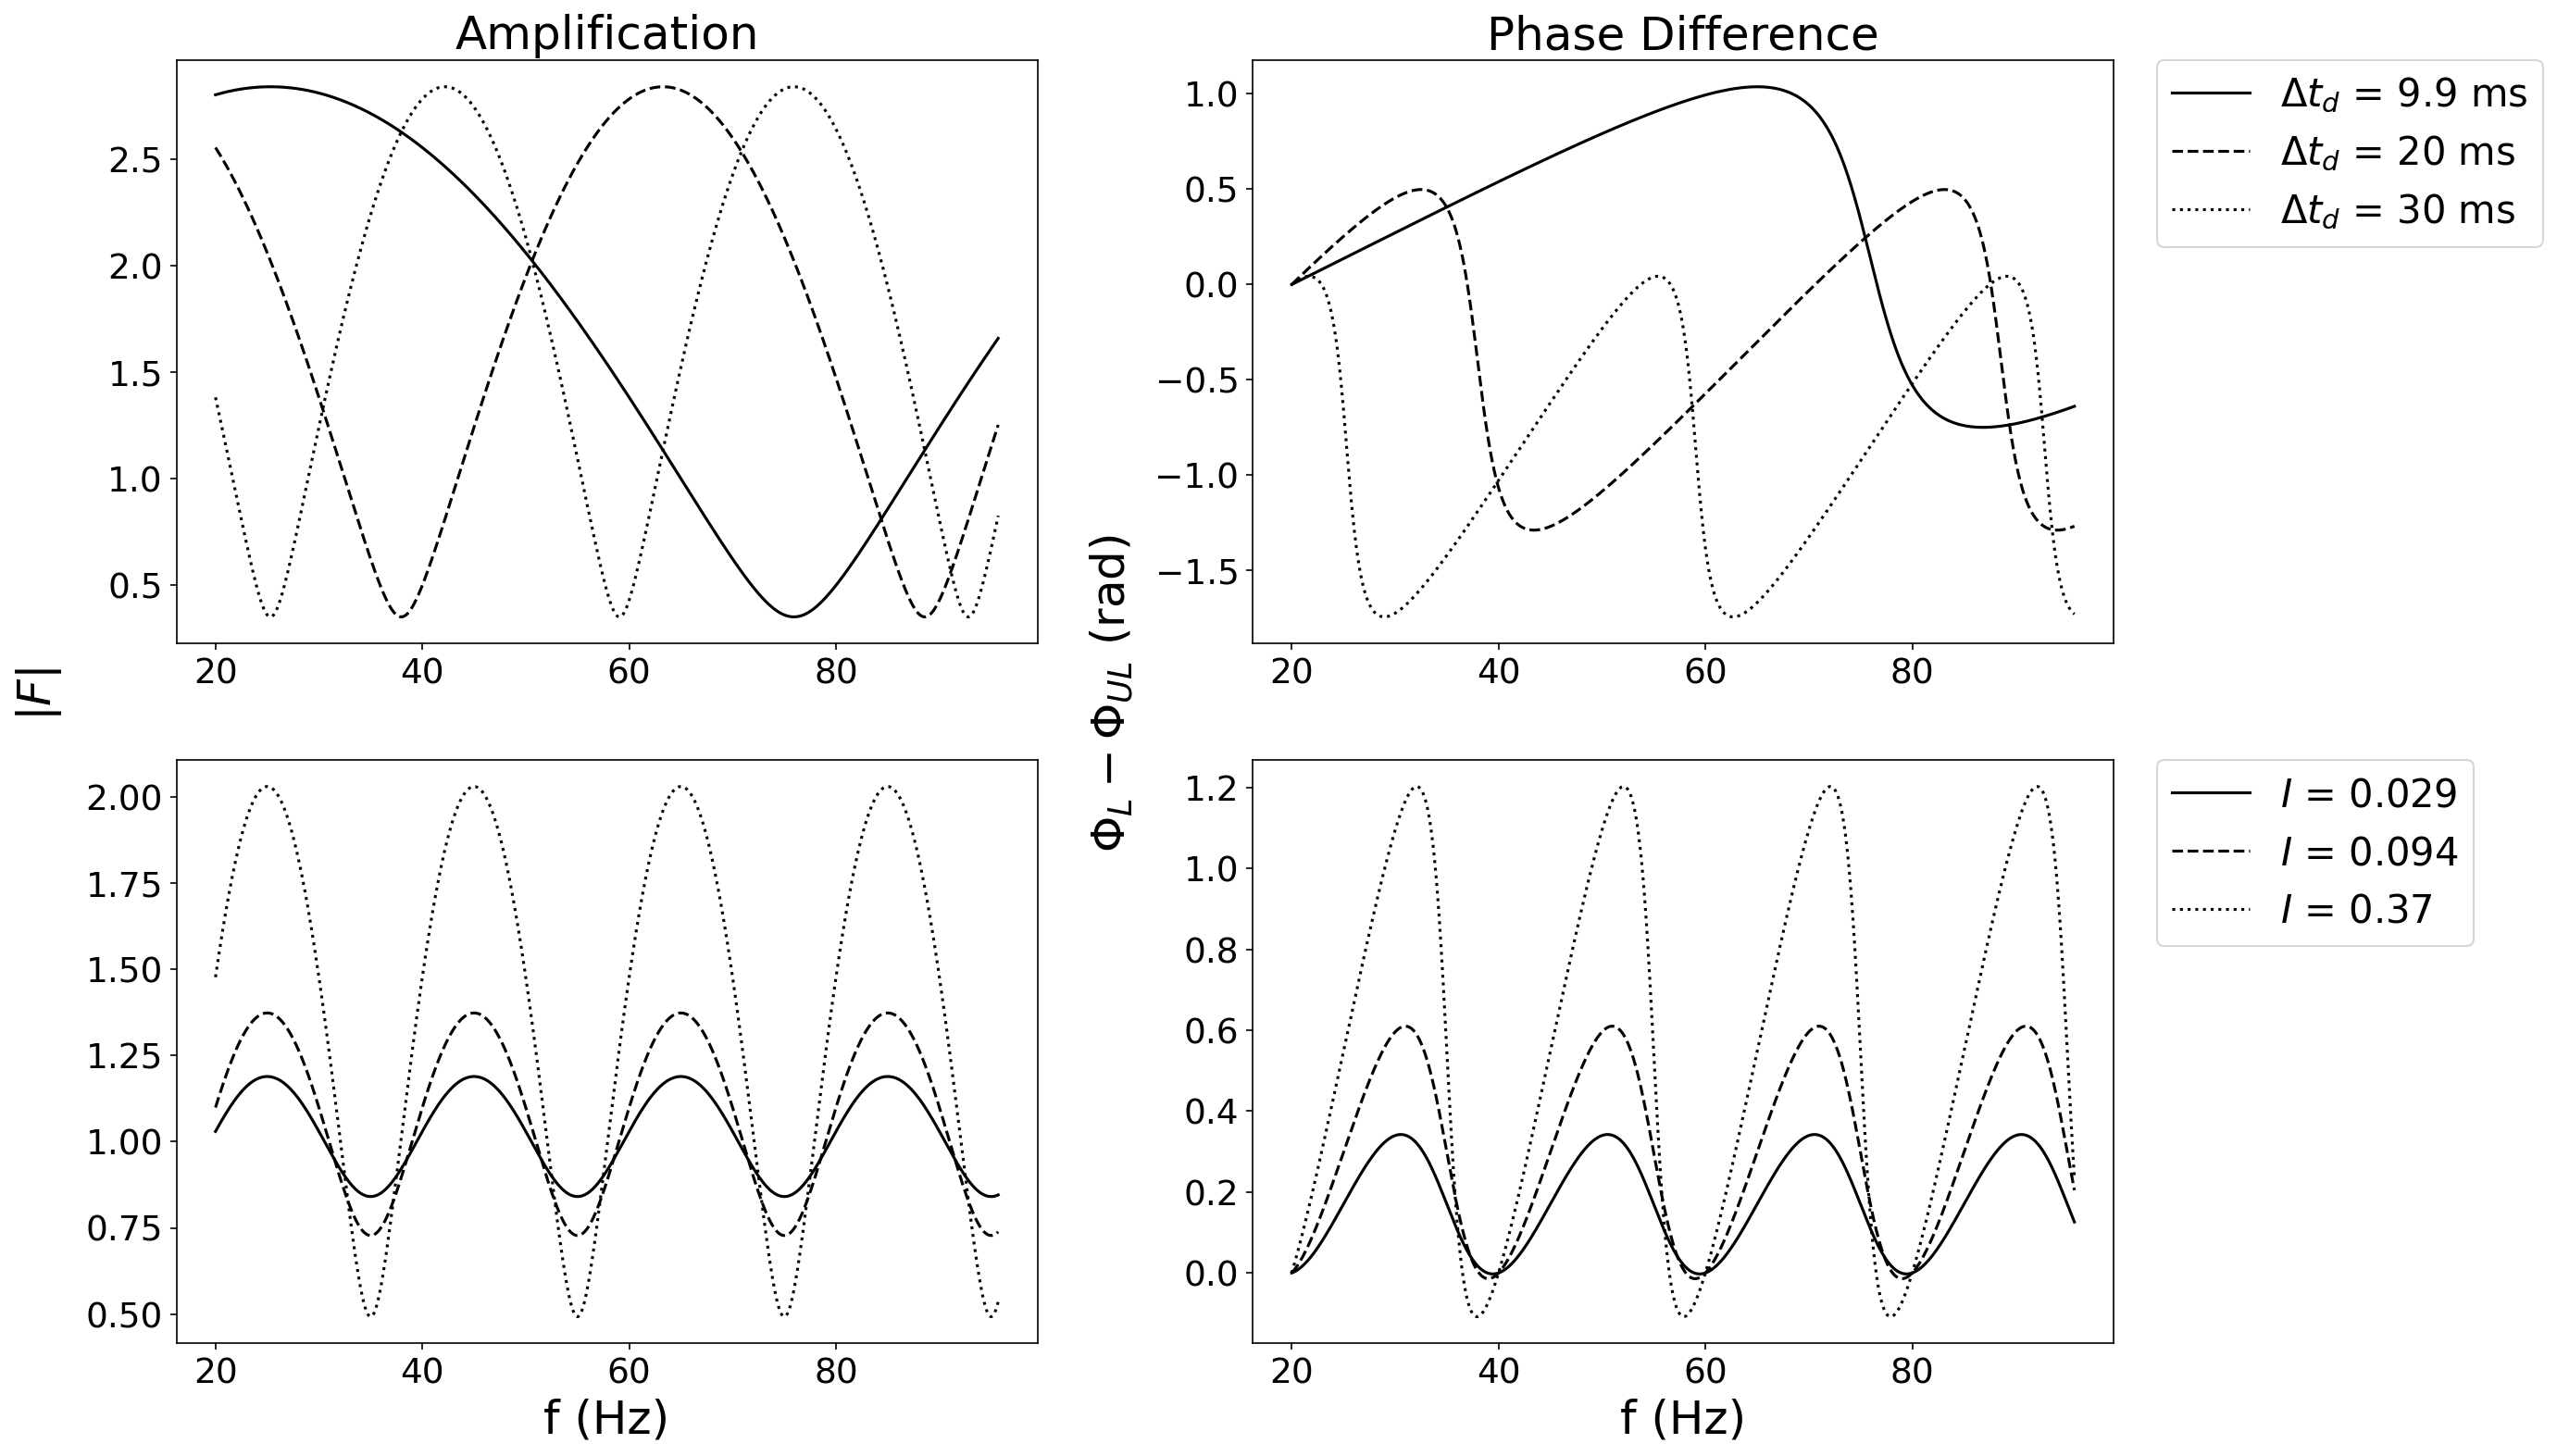

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of time delay but same I side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ['-', '--', ':']  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    Delta_td = lens_inst.Delta_td()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(f_range, np.abs(amp_fact), linestyle=line_styles[i], color='black', label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000))
    axes[0, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000))

axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Amplification", fontsize=24)

# axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of I but same time delay side by side

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 2, 3)
y_range = y_range[::-1]

I_range = np.array([])
for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    I_range = np.append(I_range, I)

def to_divide(y):
    return (2 * (y * np.sqrt(y**2 + 4) + 2 * np.log((np.sqrt(y**2 + 4) + y) / (np.sqrt(y**2 + 4) - y))))

time_delay = 0.05
MLz_range = time_delay / to_divide(y_range)

lens_params = lens_params_1.copy()
line_styles = ['-', '--', ':']  # Define the line styles

for i in range(len(y_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i]
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(f_range, np.abs(amp_fact), linestyle=line_styles[i], color='black', label="$I$ = {:.2g}".format(I))
    axes[1, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label="$I$ = {:.2g}".format(I))

axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|F|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.49, 0.5, r"$\Phi_L - \Phi_{UL}$ (rad)", va="center", rotation="vertical", fontsize=24)

Text(0.49, 0.5, '$\\Phi_L - \\Phi_{UL}$ (rad)')

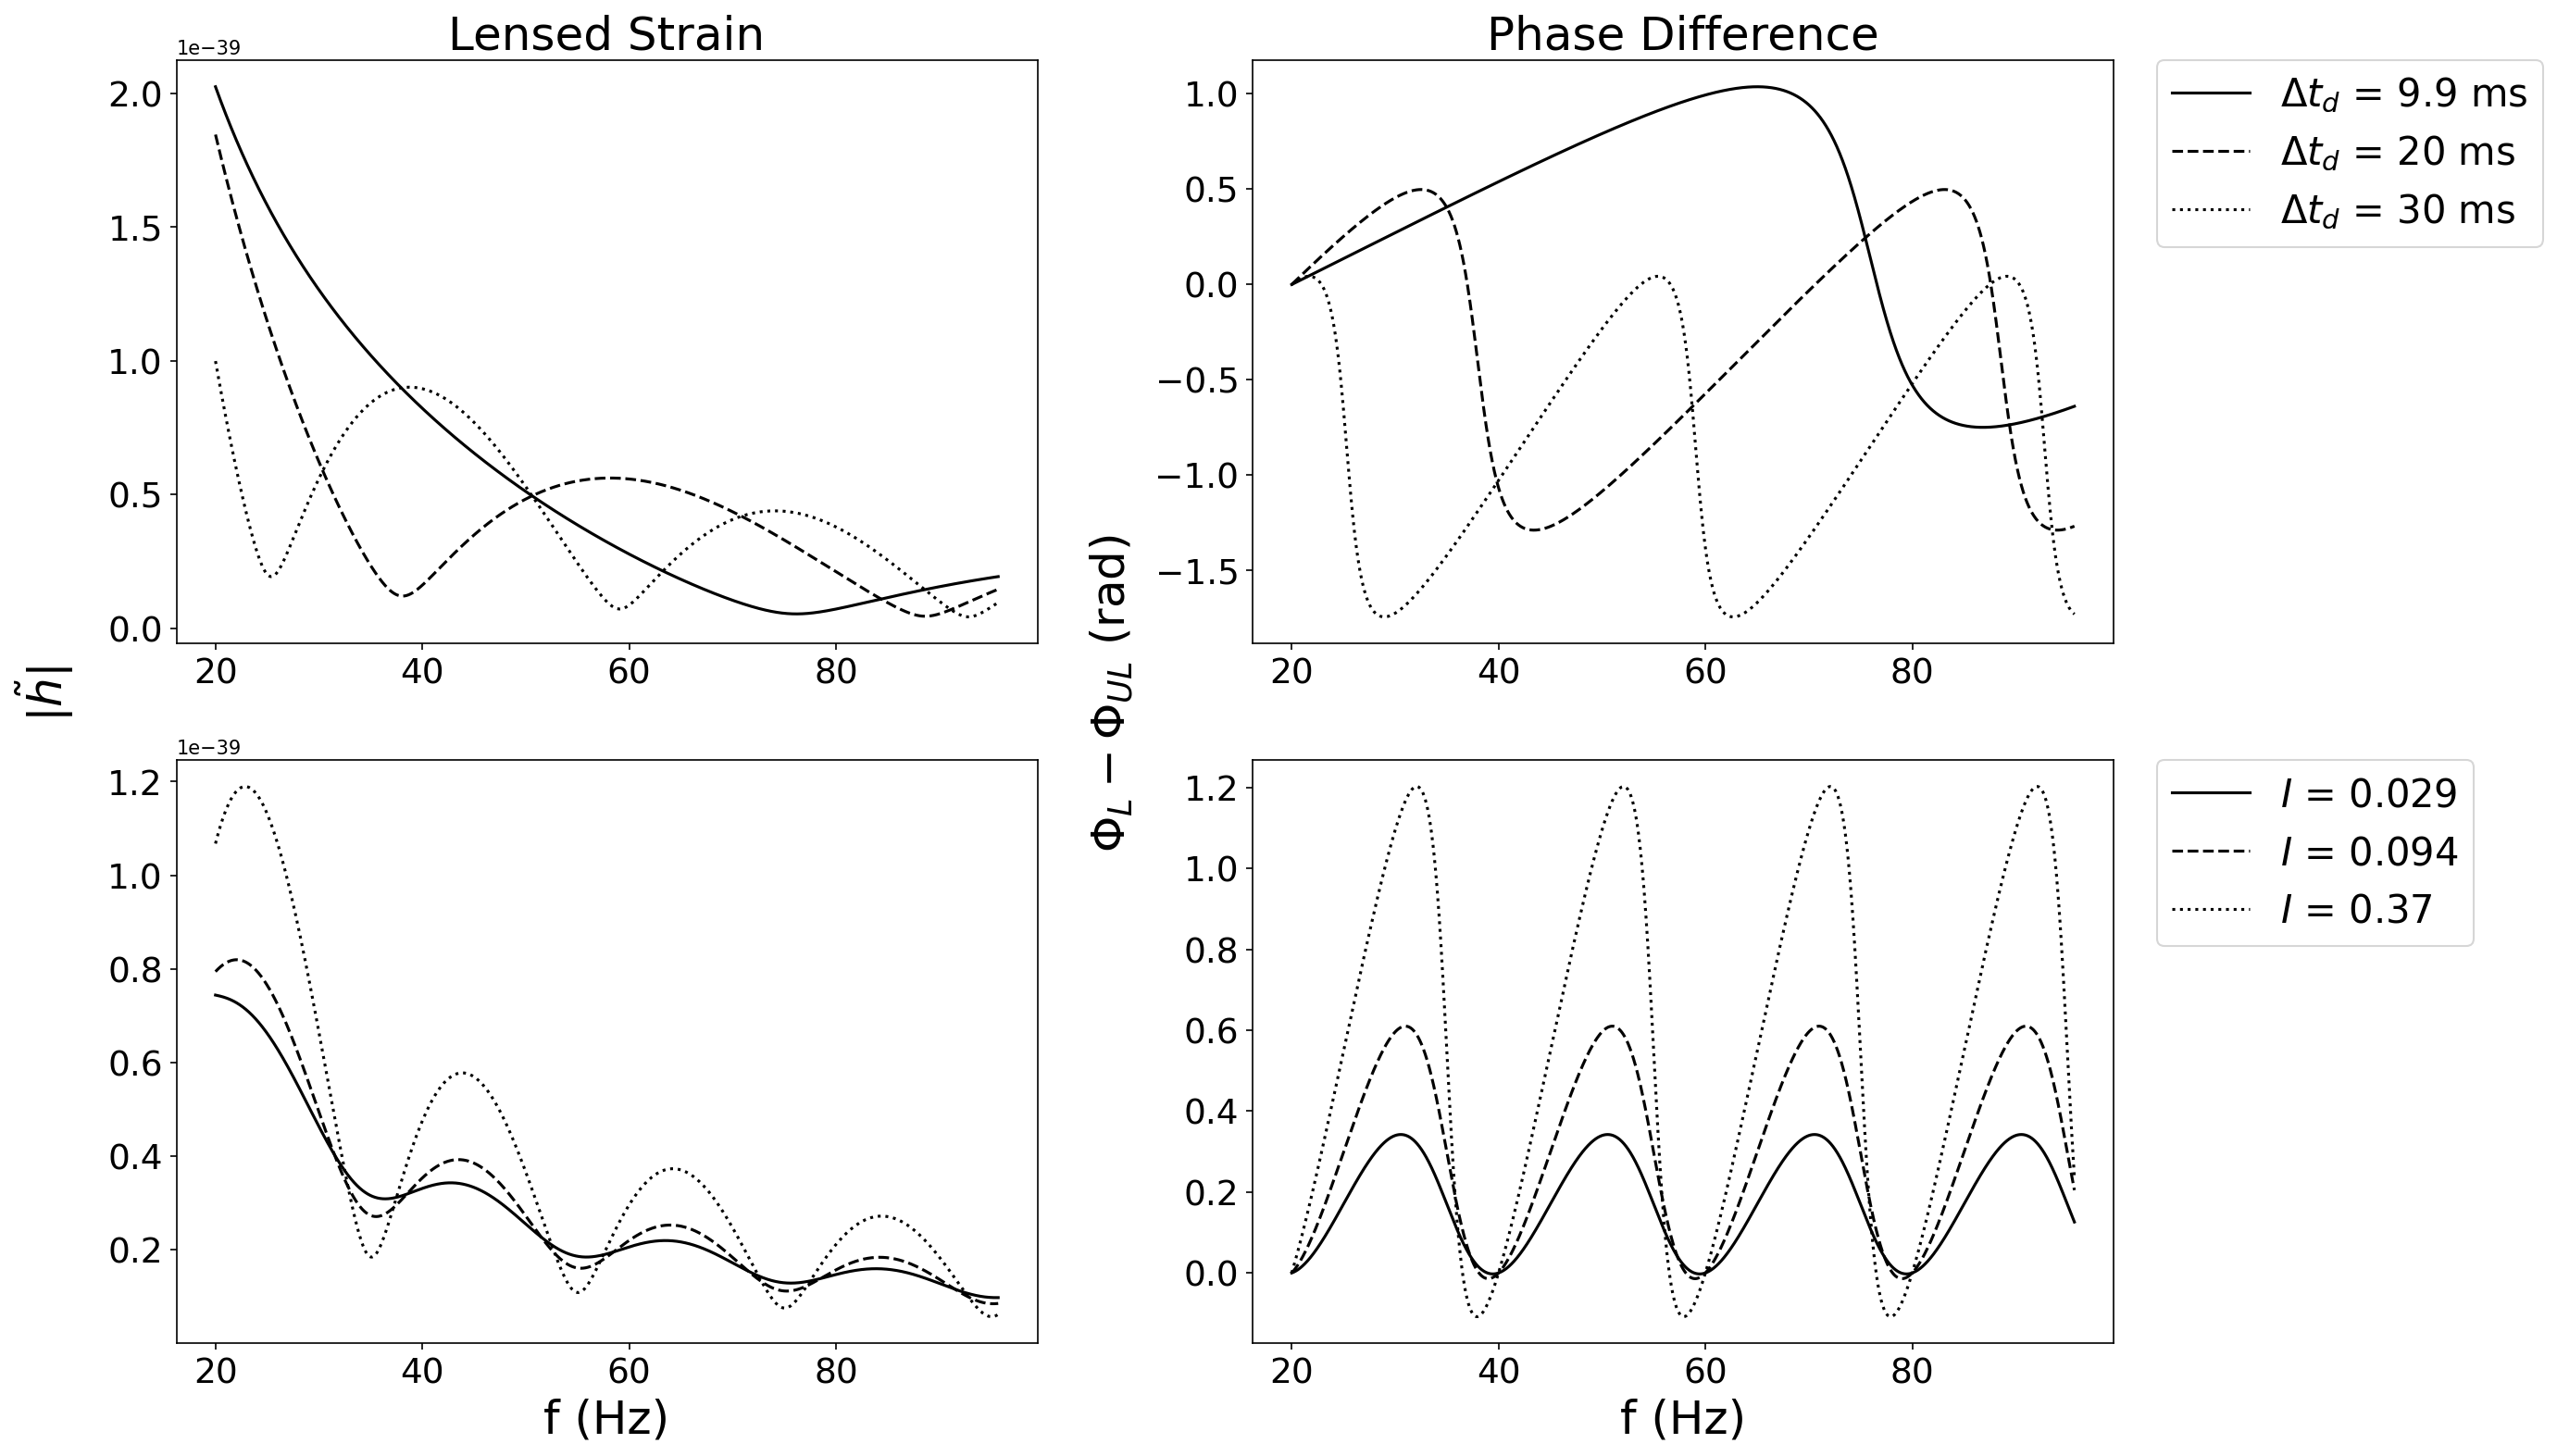

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of time delay but same I side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ['-', '--', ':']  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    Delta_td = lens_inst.Delta_td()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(f_range, np.abs(lensed_strain), linestyle=line_styles[i], color='black', label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000))
    axes[0, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000))

axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Lensed Strain", fontsize=24)

# axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of I but same time delay side by side

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 2, 3)
y_range = y_range[::-1]

I_range = np.array([])
for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    I_range = np.append(I_range, I)

def to_divide(y):
    return (2 * (y * np.sqrt(y**2 + 4) + 2 * np.log((np.sqrt(y**2 + 4) + y) / (np.sqrt(y**2 + 4) - y))))

time_delay = 0.05
MLz_range = time_delay / to_divide(y_range)

lens_params = lens_params_1.copy()
line_styles = ['-', '--', ':']  # Define the line styles

for i in range(len(y_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i]
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(f_range, np.abs(lensed_strain), linestyle=line_styles[i], color='black', label="$I$ = {:.2g}".format(I))
    axes[1, 1].plot(f_range, phase_diff, linestyle=line_styles[i], color='black', label="$I$ = {:.2g}".format(I))

axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.49, 0.5, r"$\Phi_L - \Phi_{UL}$ (rad)", va="center", rotation="vertical", fontsize=24)

# precessing

In [54]:
RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

def precession_strain_phase_plot(param_name, param_range, param_label):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    for param in param_range:
        RP_params[param_name] = param
        RP_inst = Precessing(RP_params)
        f_cut = RP_inst.f_cut()
        f_min = 20
        delta_f = 0.05
        f_range = np.arange(f_min, f_cut, delta_f)
        RP_strain = RP_inst.strain(f_range)
        phase_RP = np.unwrap(np.angle(RP_strain))

        NP_params[param_name] = param
        NP_inst = Precessing(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_min_NP = 20
        delta_f = 0.05
        f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
        NP_strain = NP_inst.strain(f_range_NP)
        phase_NP = np.unwrap(np.angle(NP_strain))

        phase_diff = phase_RP - phase_NP
        phase_diff = np.unwrap(phase_diff - phase_diff[0])

        axes[0].loglog(
            f_range,
            np.abs(RP_strain),
            label="{} = {}".format(param_label, param),
        )
        axes[1].plot(
            f_range, phase_diff, label="{} = {}".format(param_label, param)
        )

    axes[0].loglog(f_range_NP, np.abs(NP_strain), label="NP")
    axes[0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=14)
    axes[0].set_xlabel("f", fontsize=14)
    axes[0].set_ylabel(r"$|\~{h}|$", fontsize=14)
    axes[0].set_title("Regularly Precessing Strain", fontsize=16)

    axes[1].set_xscale("log")
    axes[1].set_xlabel("f", fontsize=14)
    axes[1].set_ylabel(r"$\Delta \Phi$", fontsize=14)
    axes[1].set_title("Phase Difference", fontsize=16)

Text(0.5, 0.5, '$\\Delta \\Phi$')

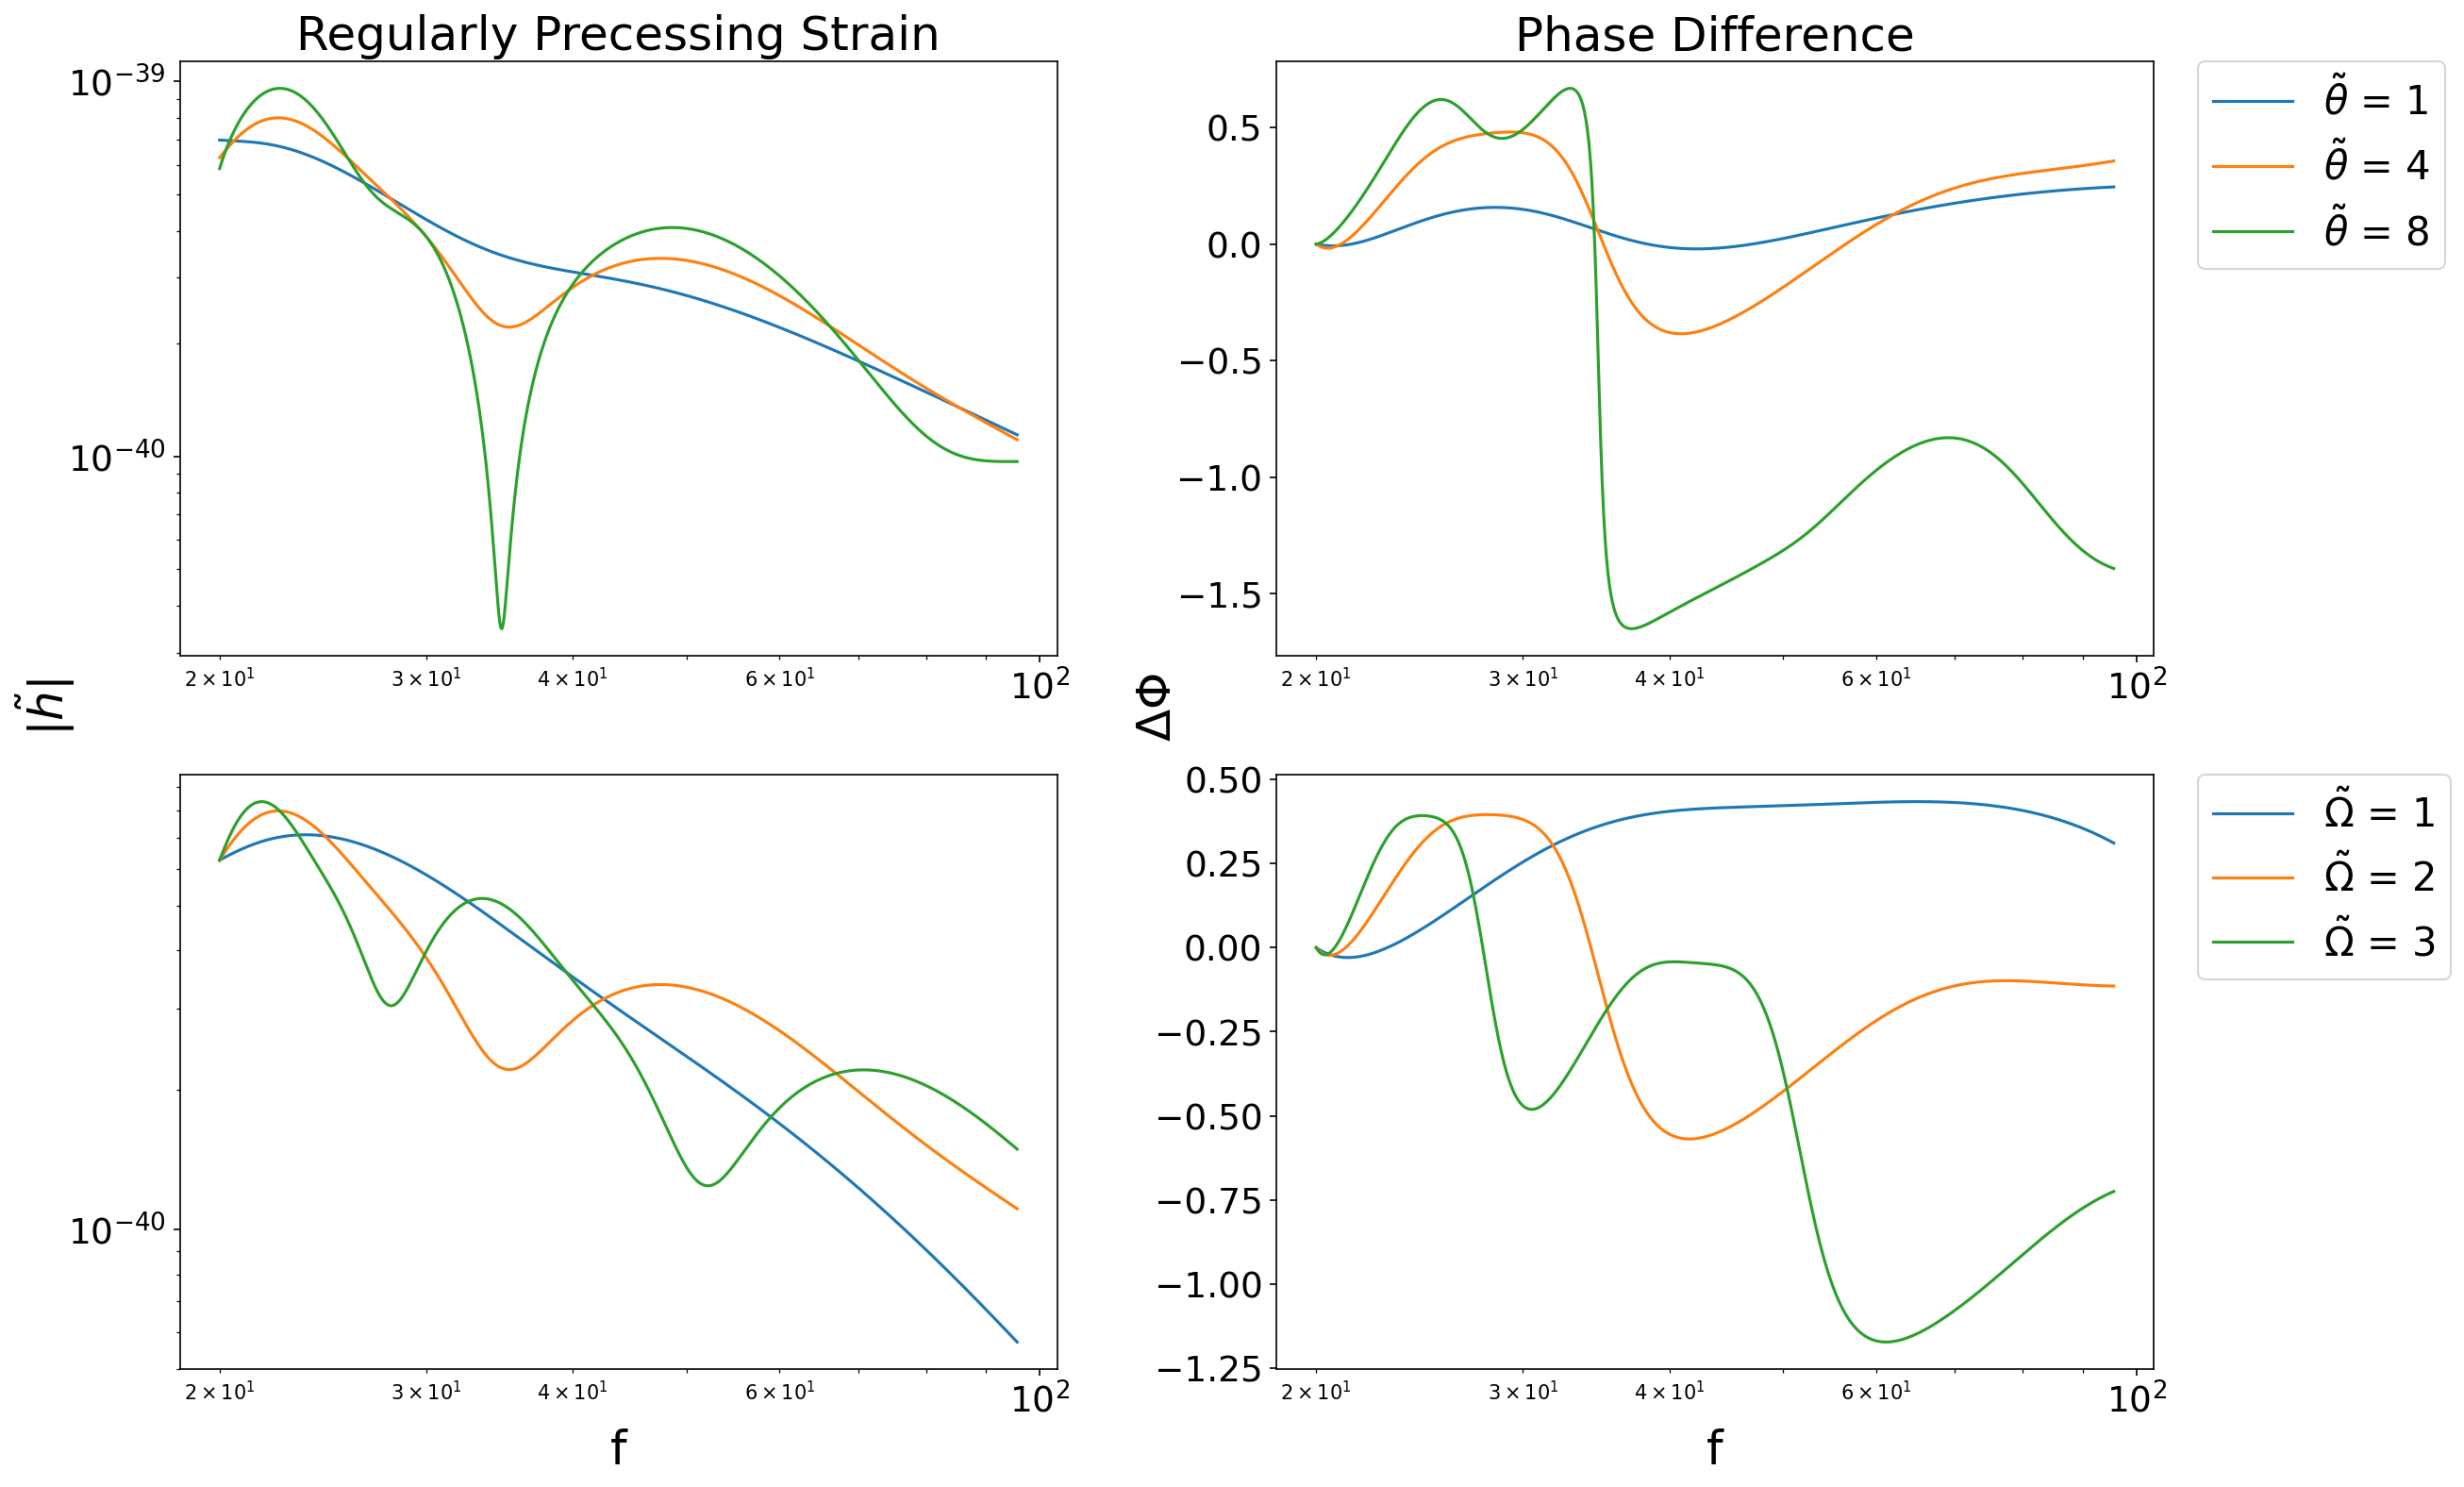

In [55]:
RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

theta_tilde_range = np.array([1, 4, 8])
for theta_tilde in theta_tilde_range:
    RP_params["theta_tilde"] = theta_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["theta_tilde"] = theta_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].loglog(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
    )
    axes[0, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde)
    )

# axes[0, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP")
axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
# axes[0, 0].set_xlabel("f", fontsize=24)
# axes[0, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Regularly Precessing Strain", fontsize=24)

axes[0, 1].set_xscale("log")
# axes[0, 1].set_xlabel("f", fontsize=24)
# axes[0, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

omega_tilde_range = np.array([1, 2, 3])
for omega_tilde in omega_tilde_range:
    RP_params["omega_tilde"] = omega_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["omega_tilde"] = omega_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].loglog(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
    )
    axes[1, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde)
    )

# axes[1, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP")
axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f", fontsize=24)
# axes[1, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 0].set_title("Regularly Precessing Strain", fontsize=24)

axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f", fontsize=24)
# axes[1, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 1].set_title("Phase Difference", fontsize=24)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.50, 0.5, r"$\Delta \Phi$", va="center", rotation="vertical", fontsize=24)

Text(0.49, 0.5, '$\\Phi_{RP} - \\Phi_{NP}$ (rad)')

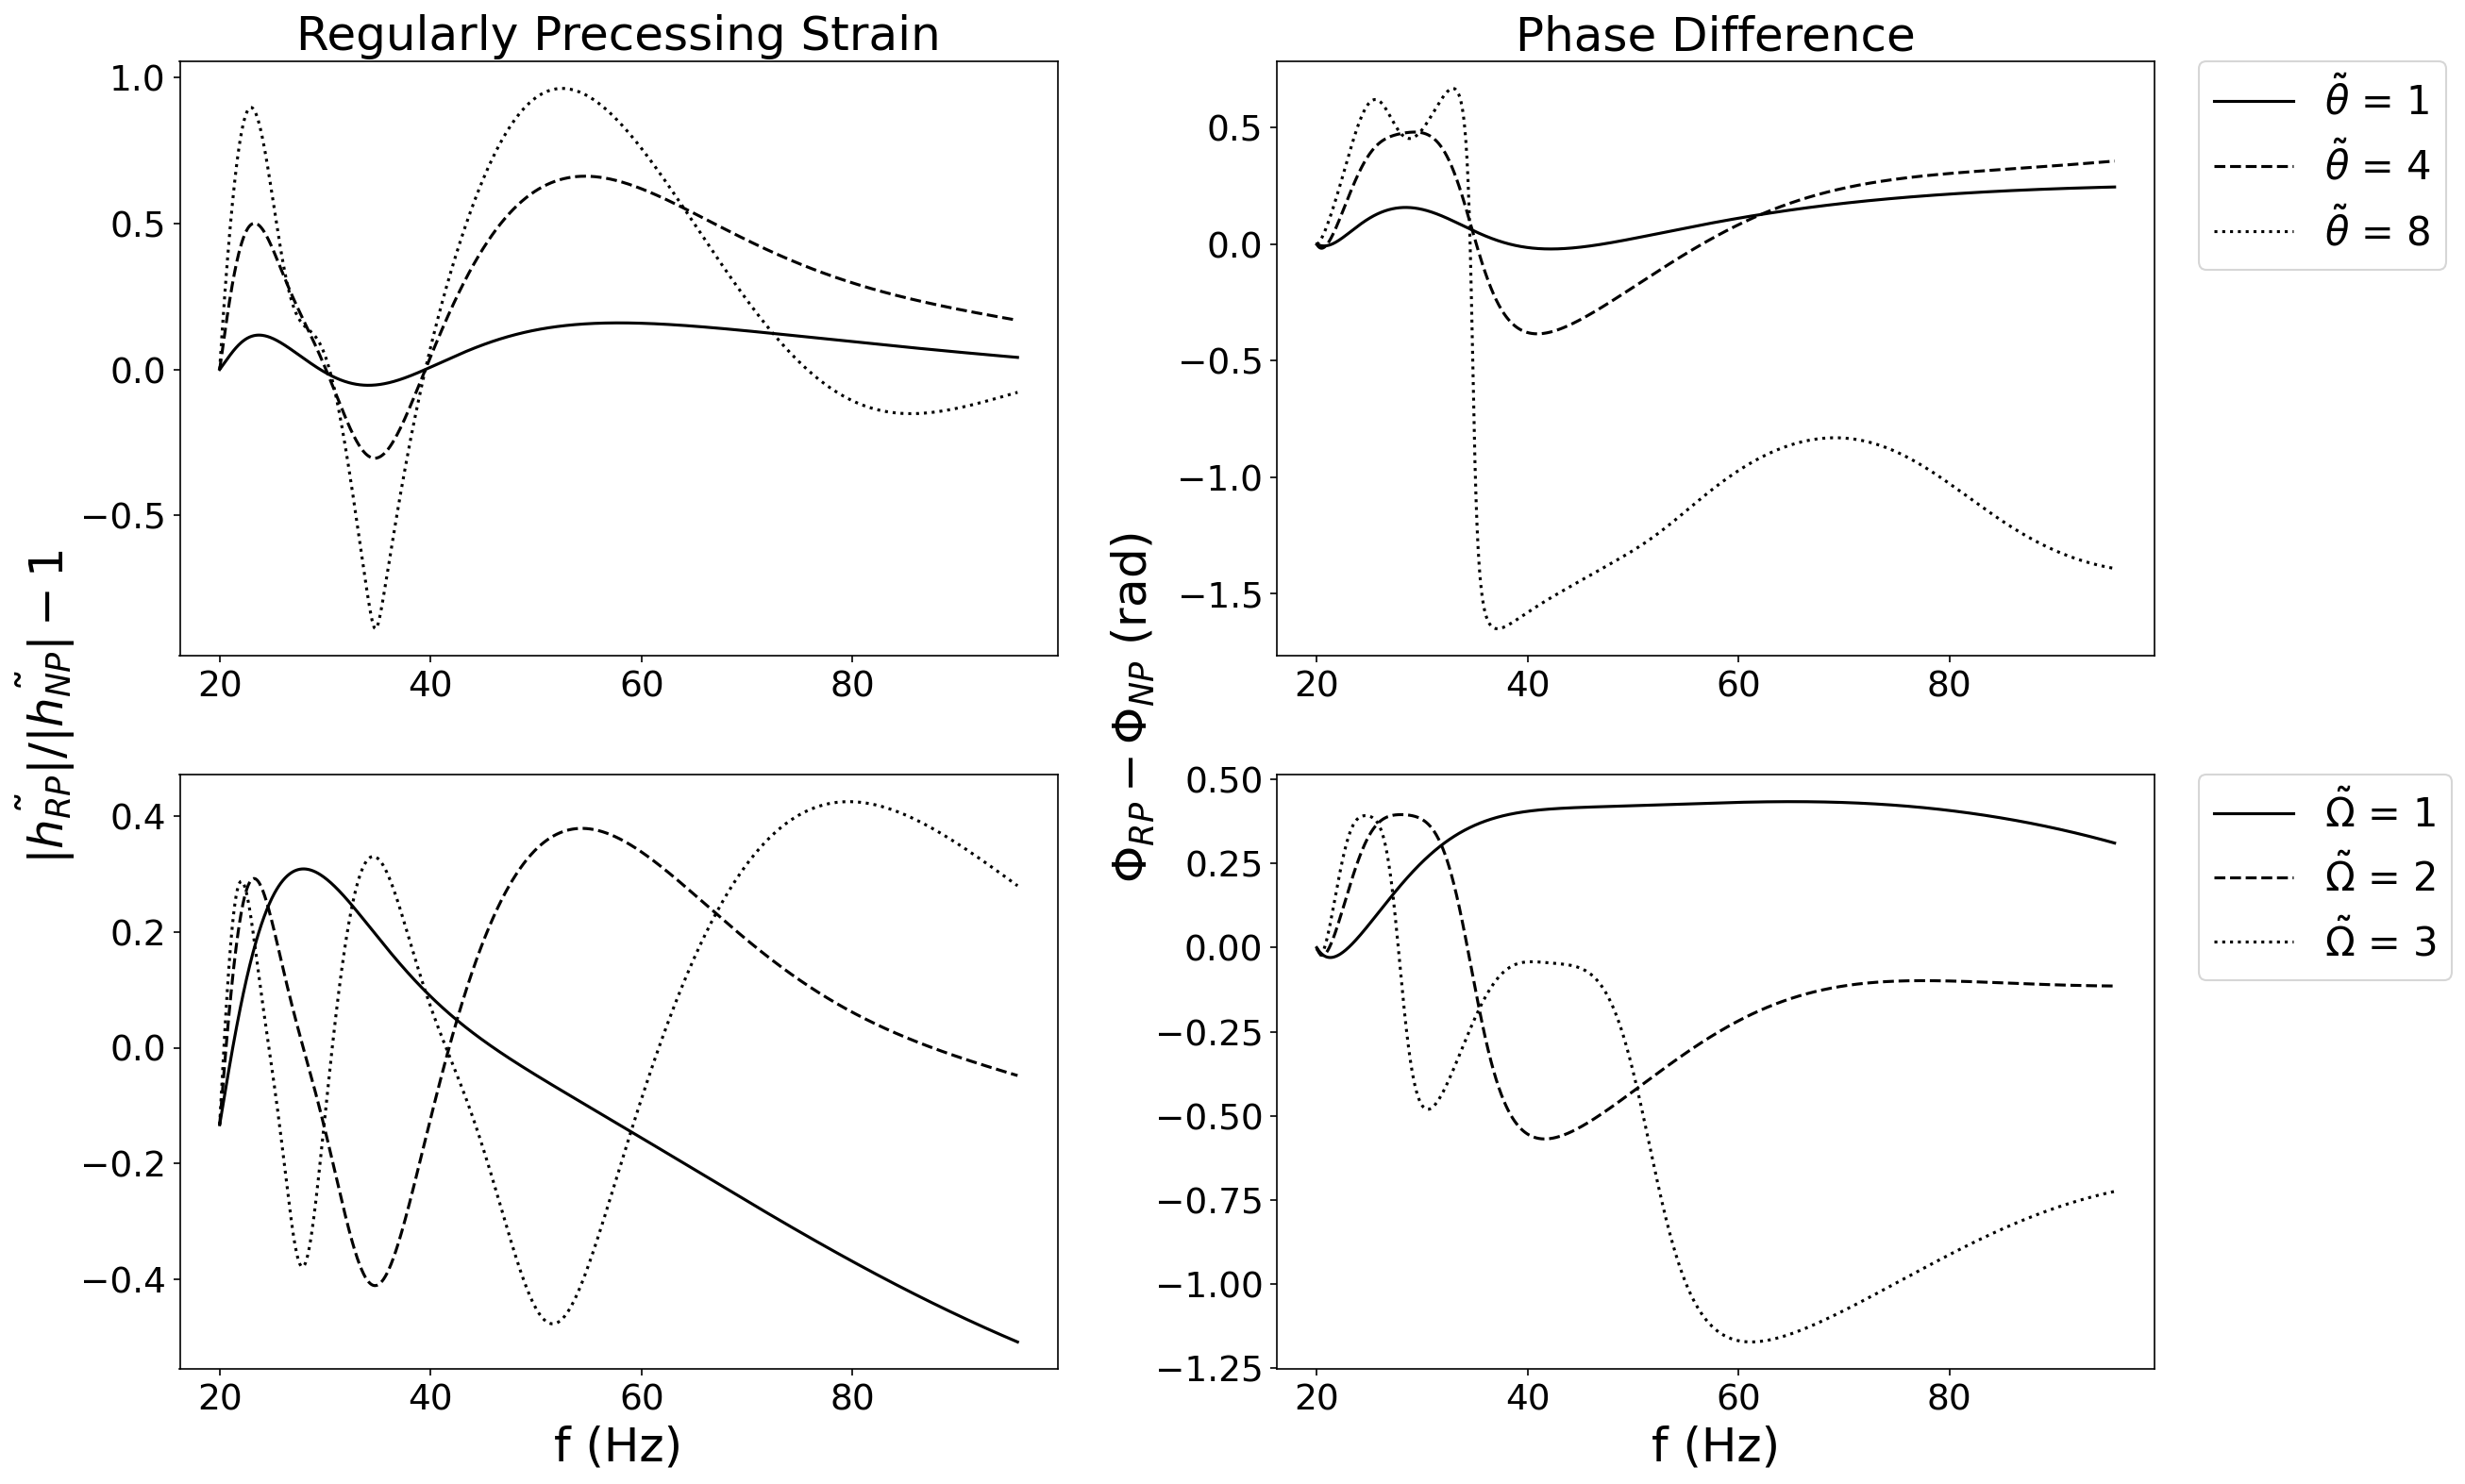

In [56]:
RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

theta_tilde_range = np.array([1, 4, 8])
line_styles = ['-', '--', ':']  # Solid, dashed, dotted

for i, theta_tilde in enumerate(theta_tilde_range):
    RP_params["theta_tilde"] = theta_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["theta_tilde"] = theta_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(
        f_range,
        np.abs(RP_strain) / np.abs(NP_strain) - 1,
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )
    axes[0, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )

# axes[0, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP", color='black', linestyle='-')
axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
# axes[0, 0].set_xlabel("f", fontsize=24)
# axes[0, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[0, 1].set_xscale("log")
# axes[0, 1].set_xlabel("f", fontsize=24)
# axes[0, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

omega_tilde_range = np.array([1, 2, 3])
line_styles = ['-', '--', ':']  # Solid, dashed, dotted

for i, omega_tilde in enumerate(omega_tilde_range):
    RP_params["omega_tilde"] = omega_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["omega_tilde"] = omega_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(
        f_range,
        np.abs(RP_strain) / np.abs(NP_strain) - 1,
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )
    axes[1, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )

# axes[1, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP", color='black', linestyle='-')
axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 1].set_title("Phase Difference", fontsize=24)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h_{RP}}| / |\~{h_{NP}}| - 1$", va="center", rotation="vertical", fontsize=24)
fig.text(0.49, 0.5, r"$\Phi_{RP} - \Phi_{NP}$ (rad)", va="center", rotation="vertical", fontsize=24)

Text(0.49, 0.5, '$\\Phi_{RP} - \\Phi_{NP}$ (rad)')

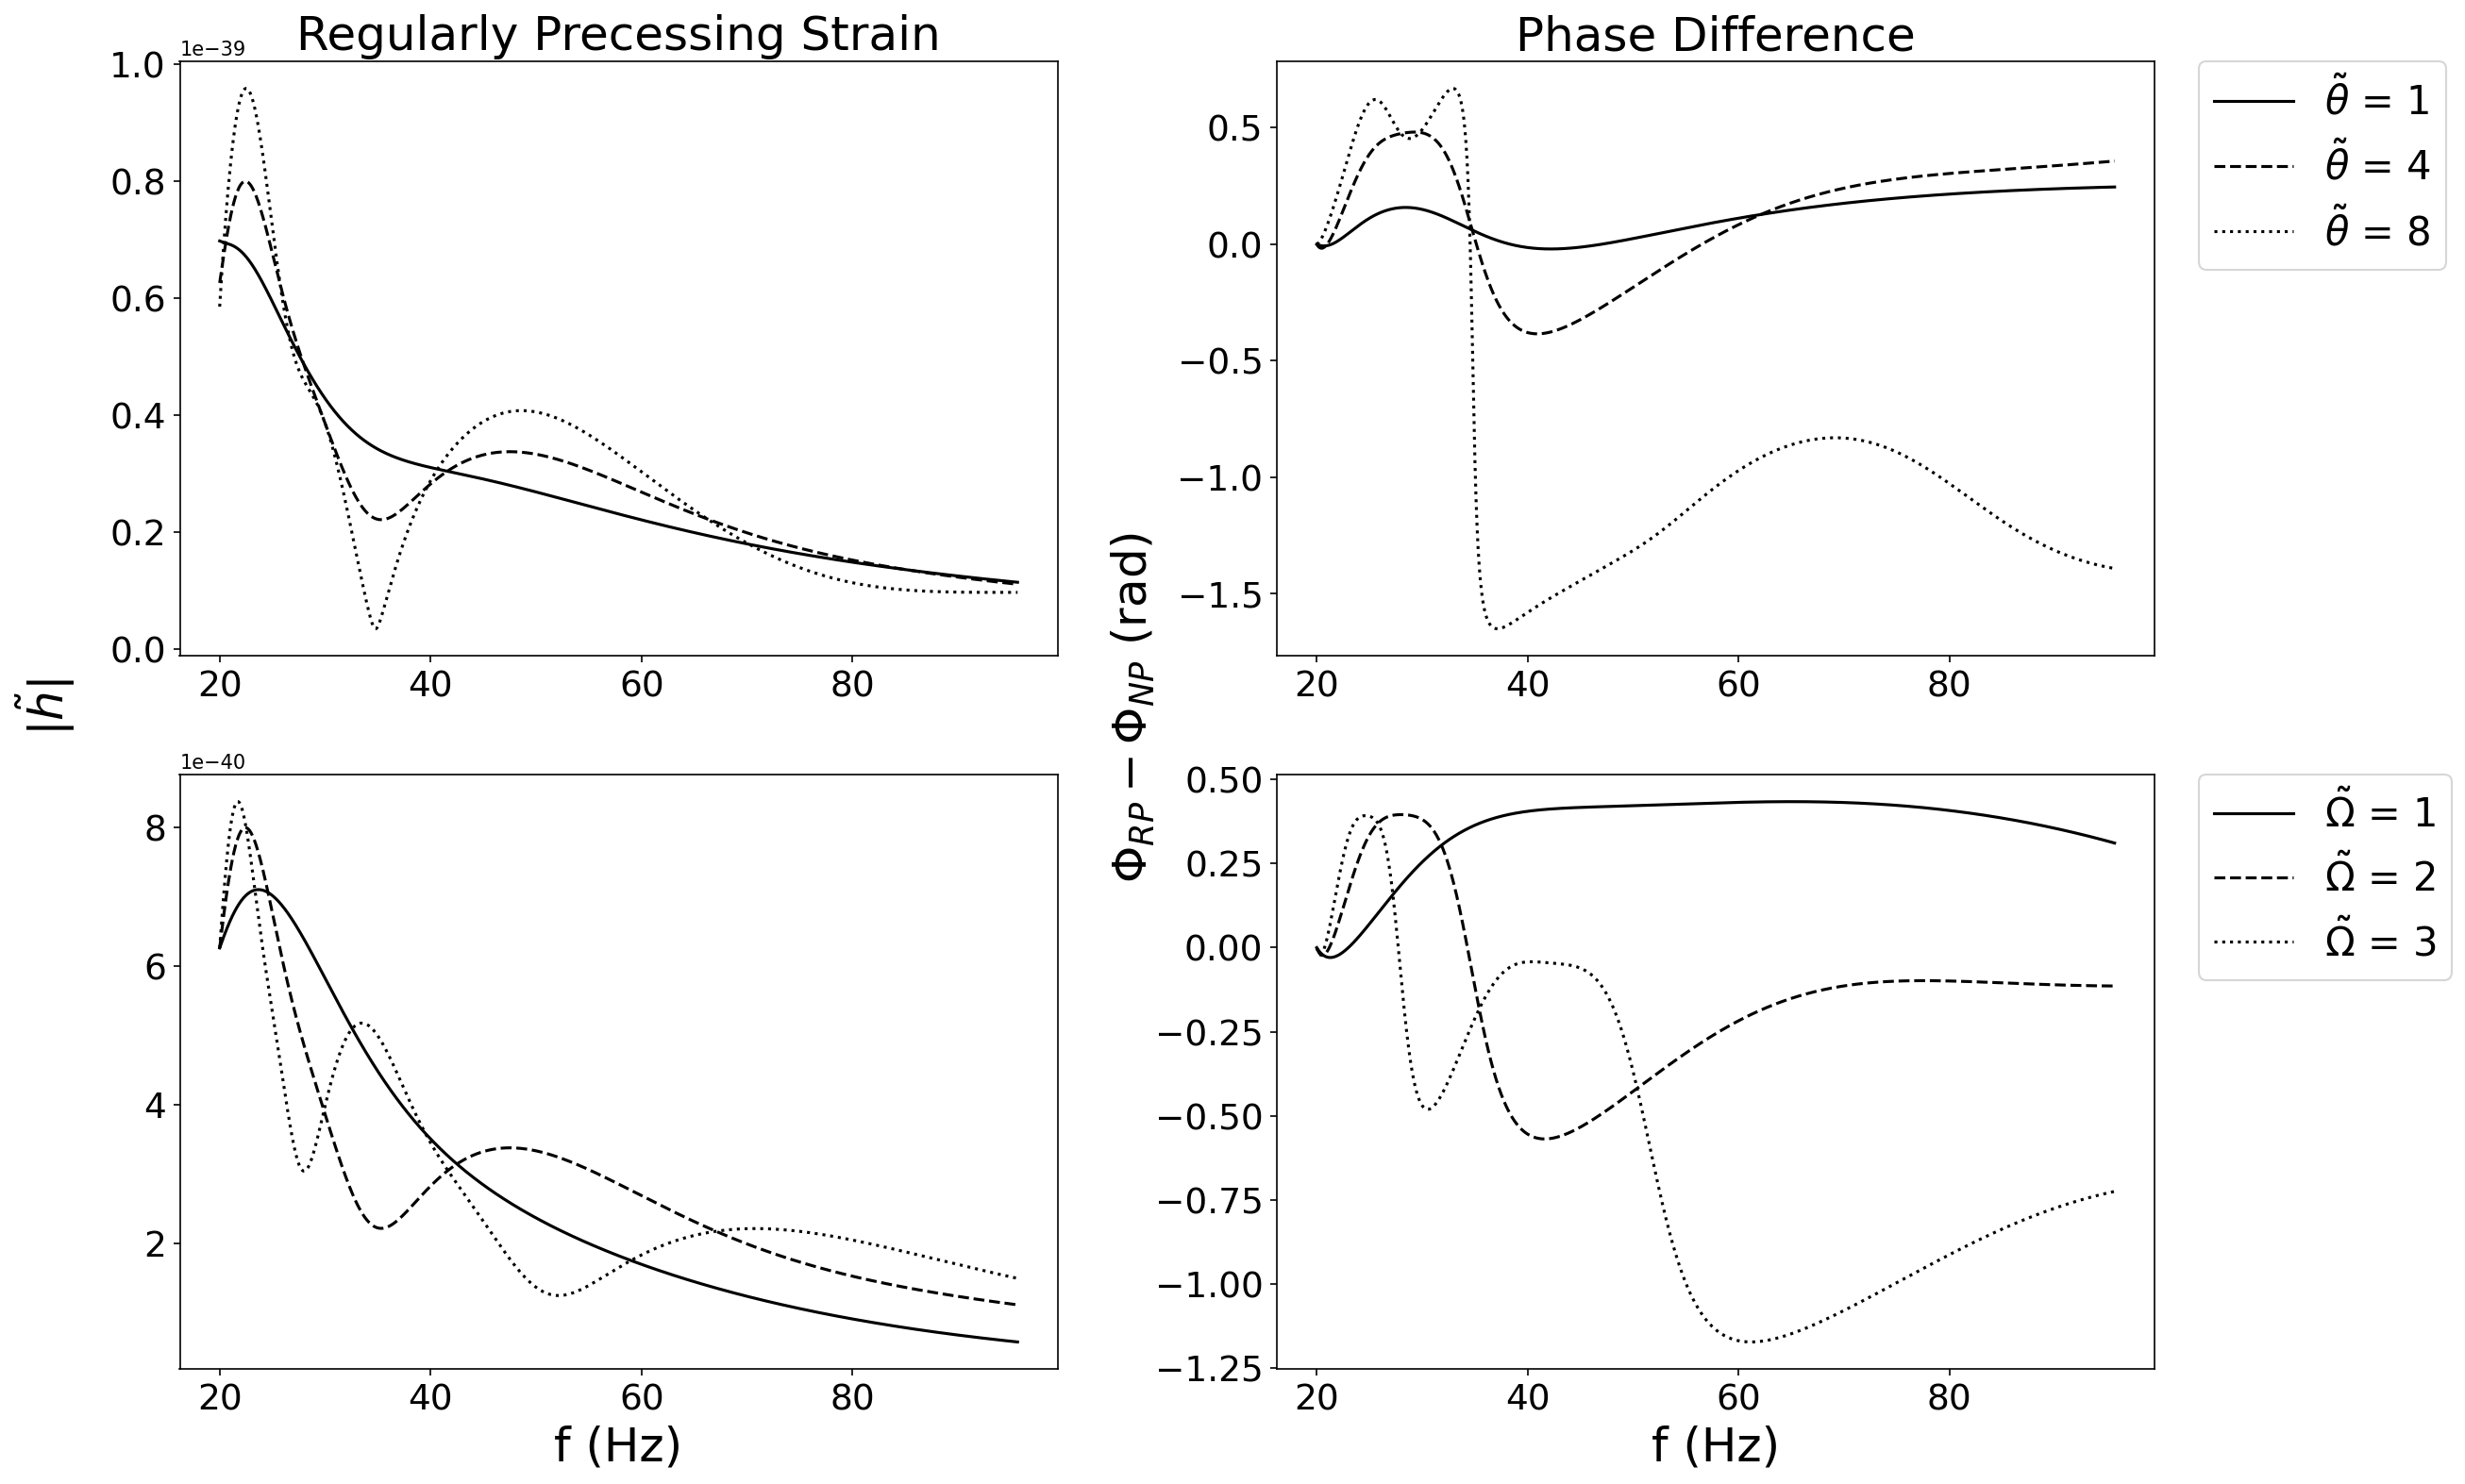

In [61]:
RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

theta_tilde_range = np.array([1, 4, 8])
line_styles = ['-', '--', ':']  # Solid, dashed, dotted

for i, theta_tilde in enumerate(theta_tilde_range):
    RP_params["theta_tilde"] = theta_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["theta_tilde"] = theta_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )
    axes[0, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )

# axes[0, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP", color='black', linestyle='-')
axes[0, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
# axes[0, 0].set_xlabel("f", fontsize=24)
# axes[0, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[0, 1].set_xscale("log")
# axes[0, 1].set_xlabel("f", fontsize=24)
# axes[0, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

omega_tilde_range = np.array([1, 2, 3])
line_styles = ['-', '--', ':']  # Solid, dashed, dotted

for i, omega_tilde in enumerate(omega_tilde_range):
    RP_params["omega_tilde"] = omega_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["omega_tilde"] = omega_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )
    axes[1, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color='black',
        linestyle=line_styles[i % len(line_styles)]
    )

# axes[1, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP", color='black', linestyle='-')
axes[1, 0].legend(bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 1].set_title("Phase Difference", fontsize=24)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.49, 0.5, r"$\Phi_{RP} - \Phi_{NP}$ (rad)", va="center", rotation="vertical", fontsize=24)

# waveform comparison

In [19]:
def waveform_comparison():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    fig.subplots_adjust(wspace=0.25)

    # RP waveform
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    axes[0].plot(f_range, np.abs(RP_strain), label="RP", color='black', linestyle='-')

    # lensed waveform
    lens_inst = LensingGeo(lens_params)
    f_cut = lens_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    lensed_strain = lens_inst.strain(f_range)
    phase_L = np.unwrap(np.angle(lensed_strain))

    axes[0].plot(f_range, np.abs(lensed_strain), label="Lensed", color='black', linestyle='--')

    axes[0].legend(fontsize=20)
    axes[0].set_xlabel("f (Hz)", fontsize=24)
    axes[0].set_ylabel(r"$|\~{h}|$", fontsize=24)
    axes[0].tick_params(axis="both", which="major", labelsize=18)
    axes[0].set_title("Strain", fontsize=24)

    phase_diff = phase_L - phase_RP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1].plot(f_range, phase_diff, label="RP", color='black', linestyle='-')
    # axes[1].plot(f_range, phase_L, label="Lensed", color='black', linestyle='--') # testing
    # axes[1].plot(f_range, phase_RP, label="RP", color='black', linestyle=':') # testing

    # axes[1].set_xscale("log")
    axes[1].set_xlabel("f (Hz)", fontsize=24)
    axes[1].set_ylabel(r"$\Phi_{L} - \Phi_{P}$ (rad)", fontsize=24)
    axes[1].tick_params(axis="both", which="major", labelsize=18)
    axes[1].set_title("Phase Difference", fontsize=24)

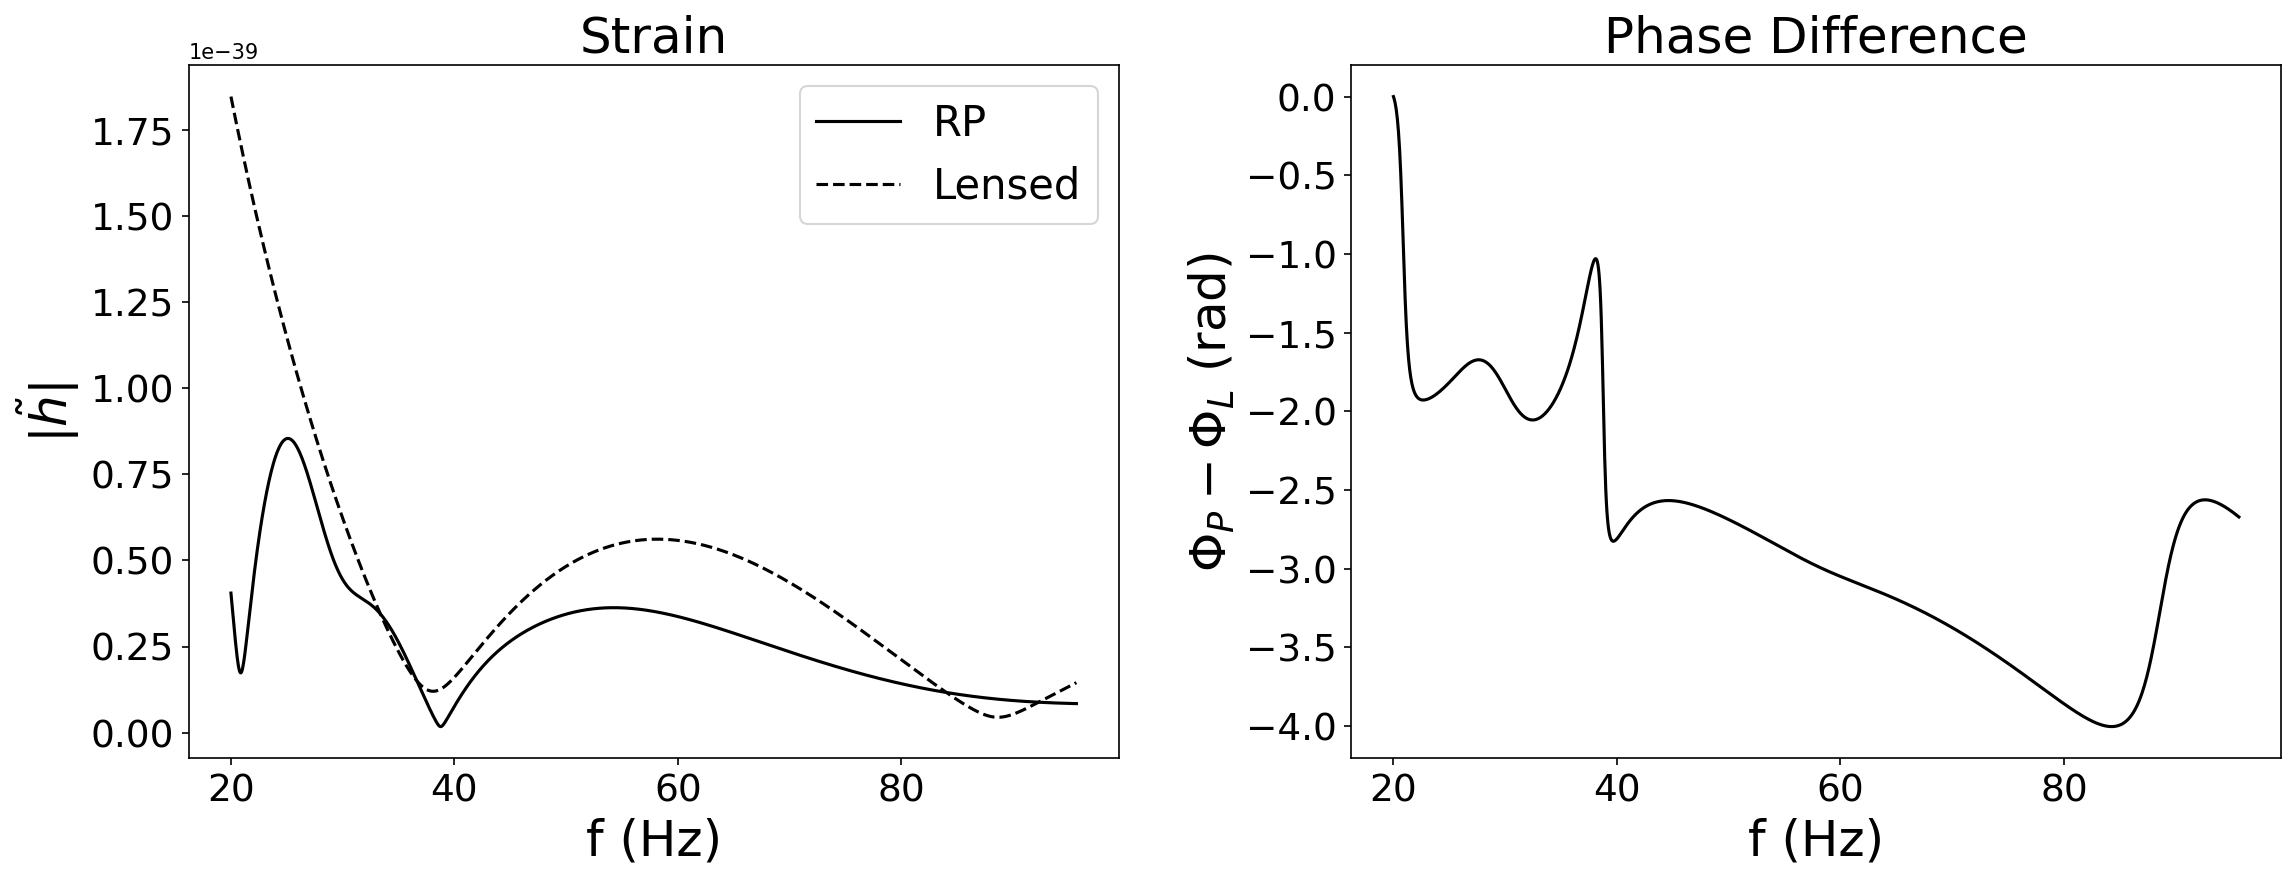

In [21]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.82

waveform_comparison()

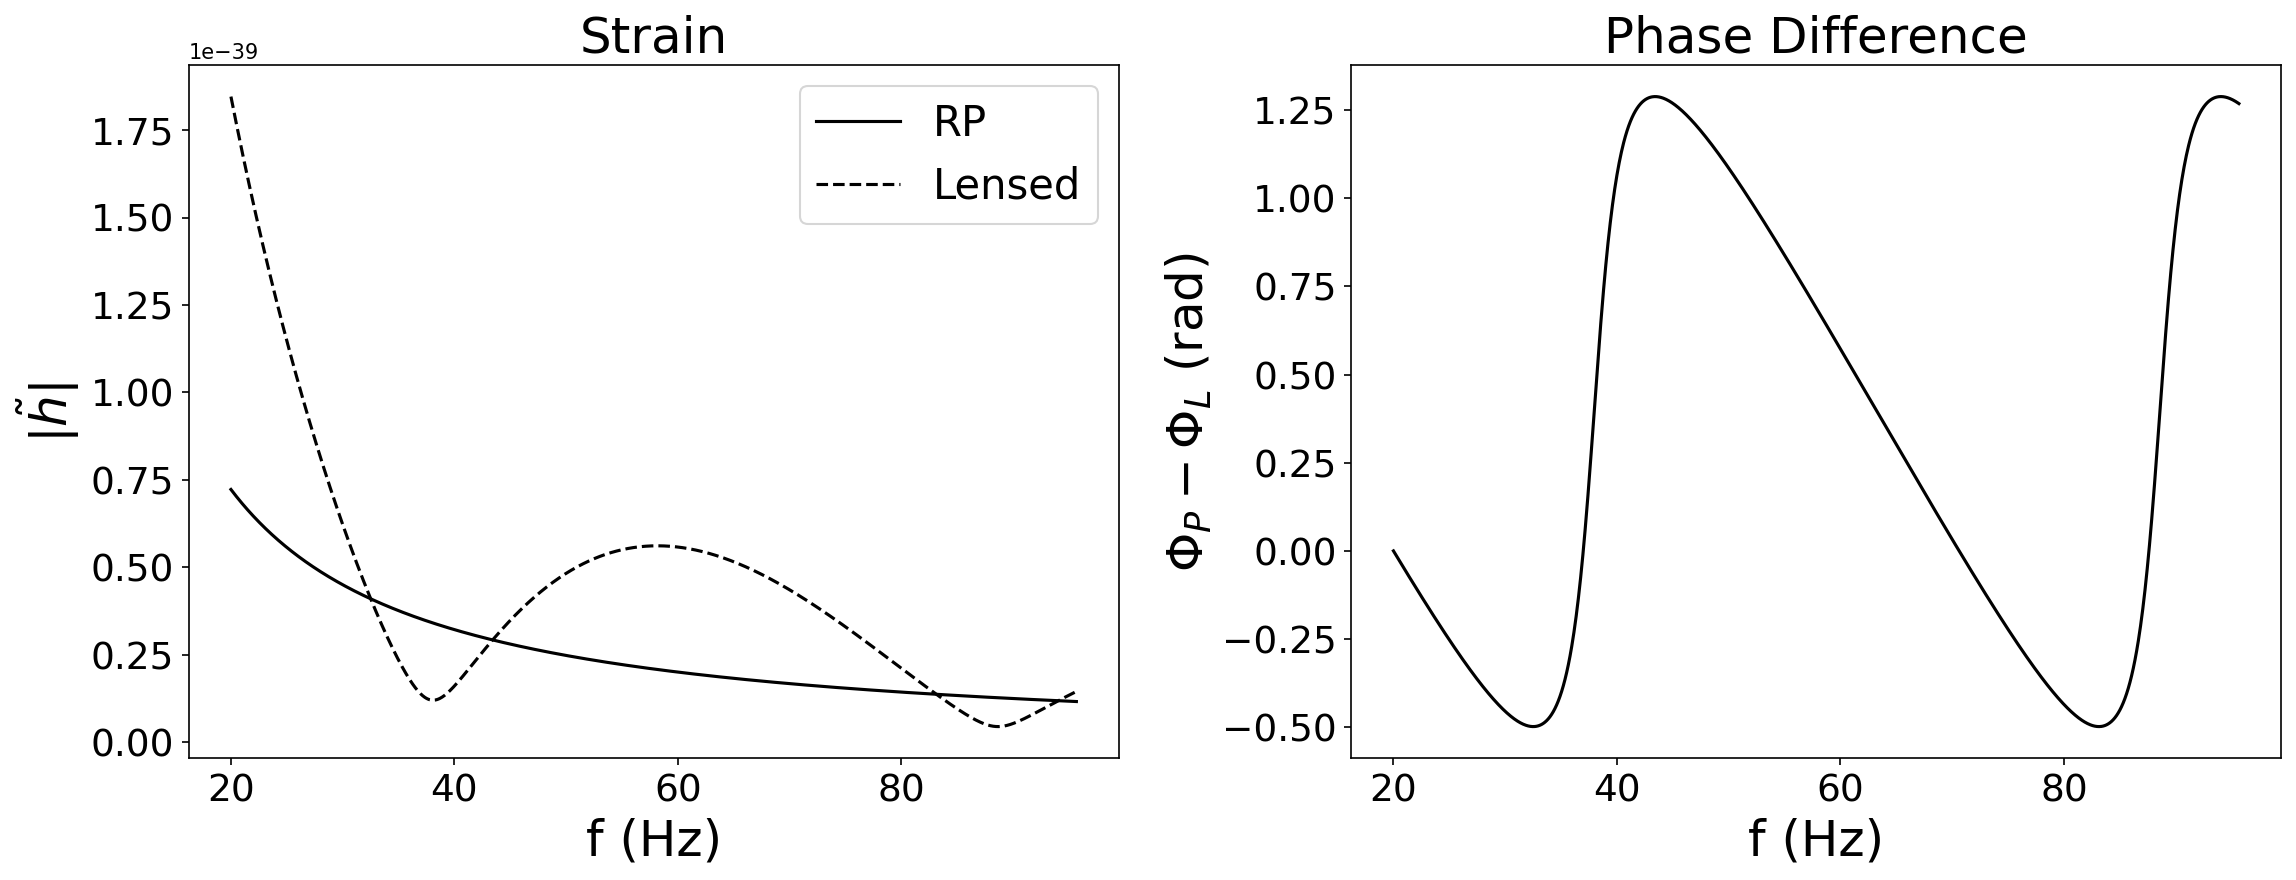

In [18]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

RP_params["omega_tilde"] = 0
RP_params["theta_tilde"] = 0
RP_params["gamma_P"] = 0

waveform_comparison()

# optimize mismatch between template NP and source L over $\mathcal{M}_{\text{NP}}$

In [10]:
def waveform_comparison_NP_L():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    fig.subplots_adjust(wspace=0.25)

    # NP waveform
    NP_inst = Precessing(NP_params)
    f_cut = NP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    NP_strain = NP_inst.strain(f_range)
    phase_NP = np.unwrap(np.angle(NP_strain))

    axes[0].plot(f_range, np.abs(NP_strain), label="NP", color='black', linestyle='-')

    # lensed waveform
    lens_inst = LensingGeo(lens_params)
    f_cut = lens_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    lensed_strain = lens_inst.strain(f_range)
    phase_L = np.unwrap(np.angle(lensed_strain))

    axes[0].plot(f_range, np.abs(lensed_strain), label="Lensed", color='black', linestyle='--')

    axes[0].legend(fontsize=20)
    axes[0].set_xlabel("f (Hz)", fontsize=24)
    axes[0].set_ylabel(r"$|\~{h}|$", fontsize=24)
    axes[0].tick_params(axis="both", which="major", labelsize=18)
    axes[0].set_title("Strain", fontsize=24)

    # Determine the minimum length
    min_len = min(phase_NP.shape[0], phase_L.shape[0])
    # Trim the arrays to the minimum length
    phase_NP = phase_NP[:min_len]
    phase_L = phase_L[:min_len]
    
    phase_diff = phase_L - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1].plot(f_range, phase_diff, color='black', linestyle='-')

    # axes[1].set_xscale("log")
    axes[1].set_xlabel("f (Hz)", fontsize=24)
    axes[1].set_ylabel(r"$\Phi_{L} - \Phi_{NP}$ (rad)", fontsize=24)
    axes[1].tick_params(axis="both", which="major", labelsize=18)
    axes[1].set_title("Phase Difference", fontsize=24)

In [5]:
# open "data/optimized_mcz_dict_ML_2000.pkl" pickle file
with open("data/optimized_mcz_dict_ML_2000.pkl", "rb") as f:
    optimized_mcz_dict_ML_2000 = pickle.load(f)

In [6]:
optimized_mcz_dict_ML_2000

{'mcz_L_arr': array([10.        , 10.80808081, 11.61616162, 12.42424242, 13.23232323,
        14.04040404, 14.84848485, 15.65656566, 16.46464646, 17.27272727,
        18.08080808, 18.88888889, 19.6969697 , 20.50505051, 21.31313131,
        22.12121212, 22.92929293, 23.73737374, 24.54545455, 25.35353535,
        26.16161616, 26.96969697, 27.77777778, 28.58585859, 29.39393939,
        30.2020202 , 31.01010101, 31.81818182, 32.62626263, 33.43434343,
        34.24242424, 35.05050505, 35.85858586, 36.66666667, 37.47474747,
        38.28282828, 39.09090909, 39.8989899 , 40.70707071, 41.51515152,
        42.32323232, 43.13131313, 43.93939394, 44.74747475, 45.55555556,
        46.36363636, 47.17171717, 47.97979798, 48.78787879, 49.5959596 ,
        50.4040404 , 51.21212121, 52.02020202, 52.82828283, 53.63636364,
        54.44444444, 55.25252525, 56.06060606, 56.86868687, 57.67676768,
        58.48484848, 59.29292929, 60.1010101 , 60.90909091, 61.71717172,
        62.52525253, 63.33333333, 64.1

ValueError: x and y must have same first dimension, but have shapes (1925,) and (1792,)

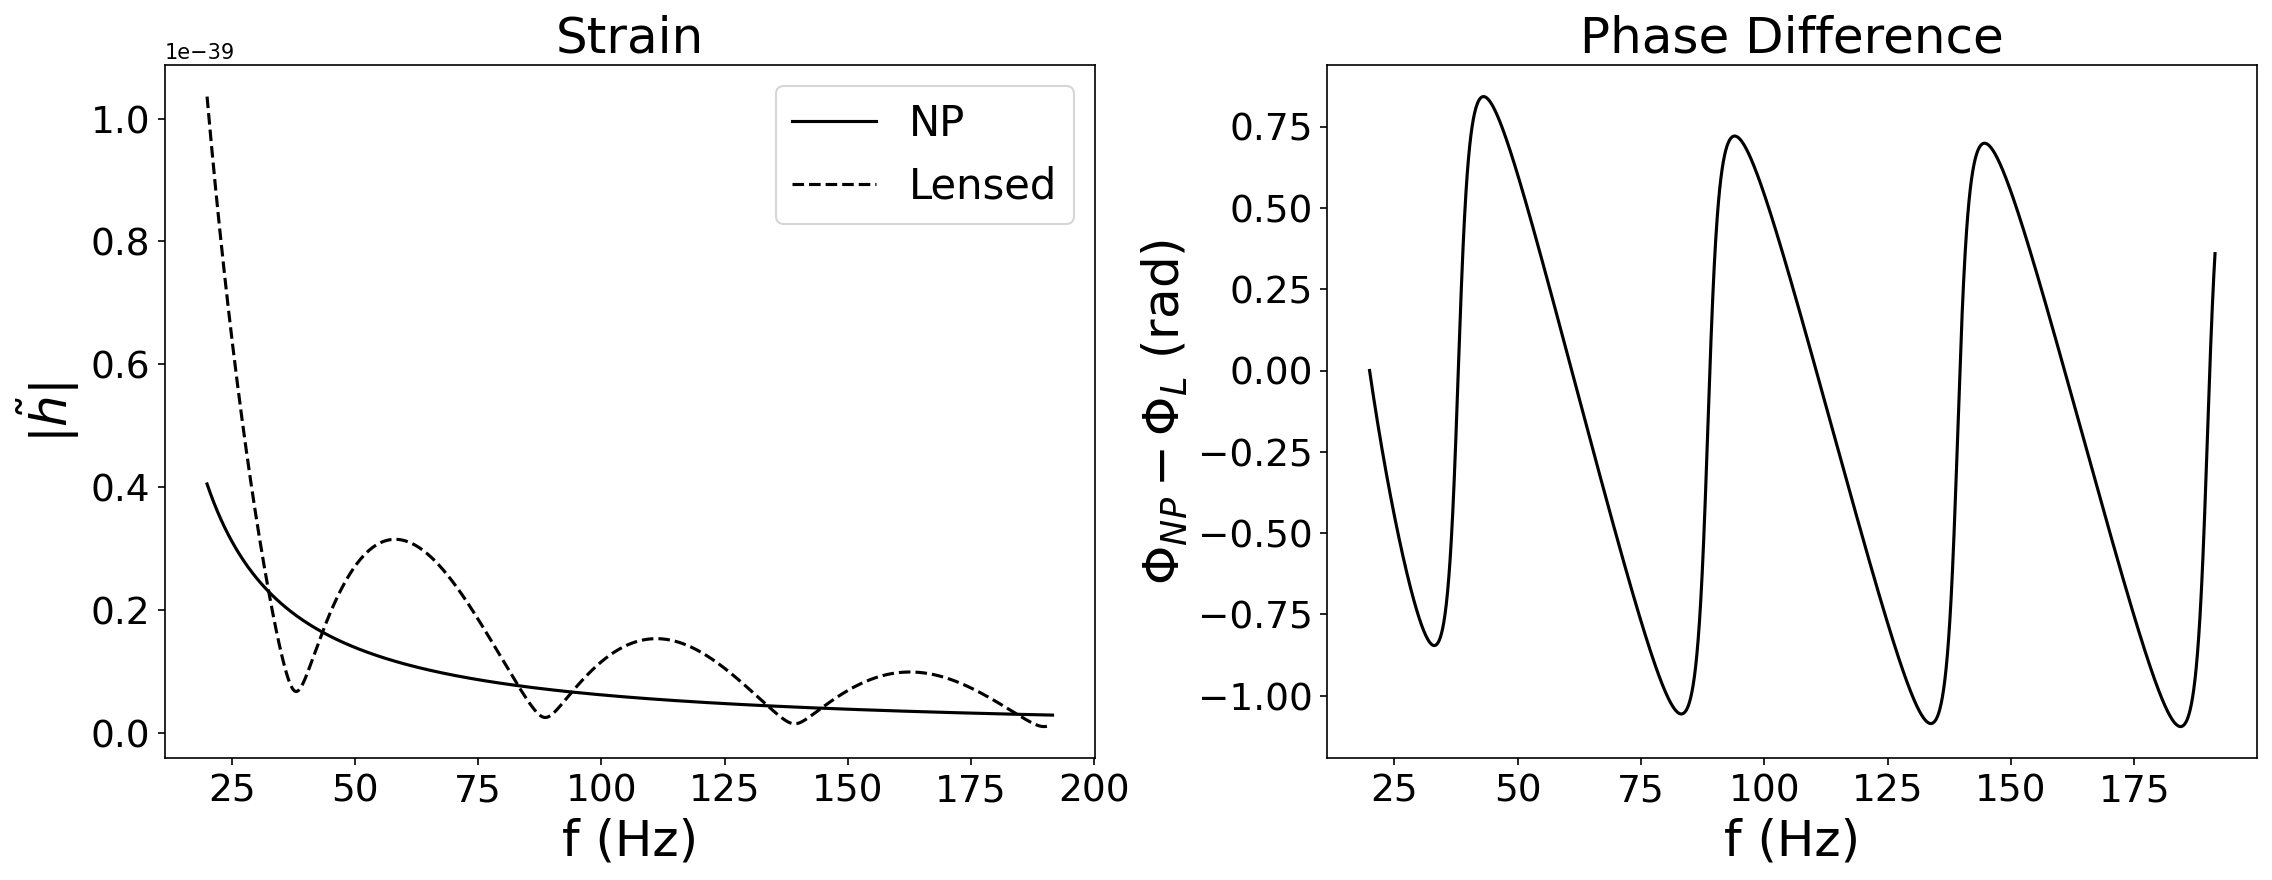

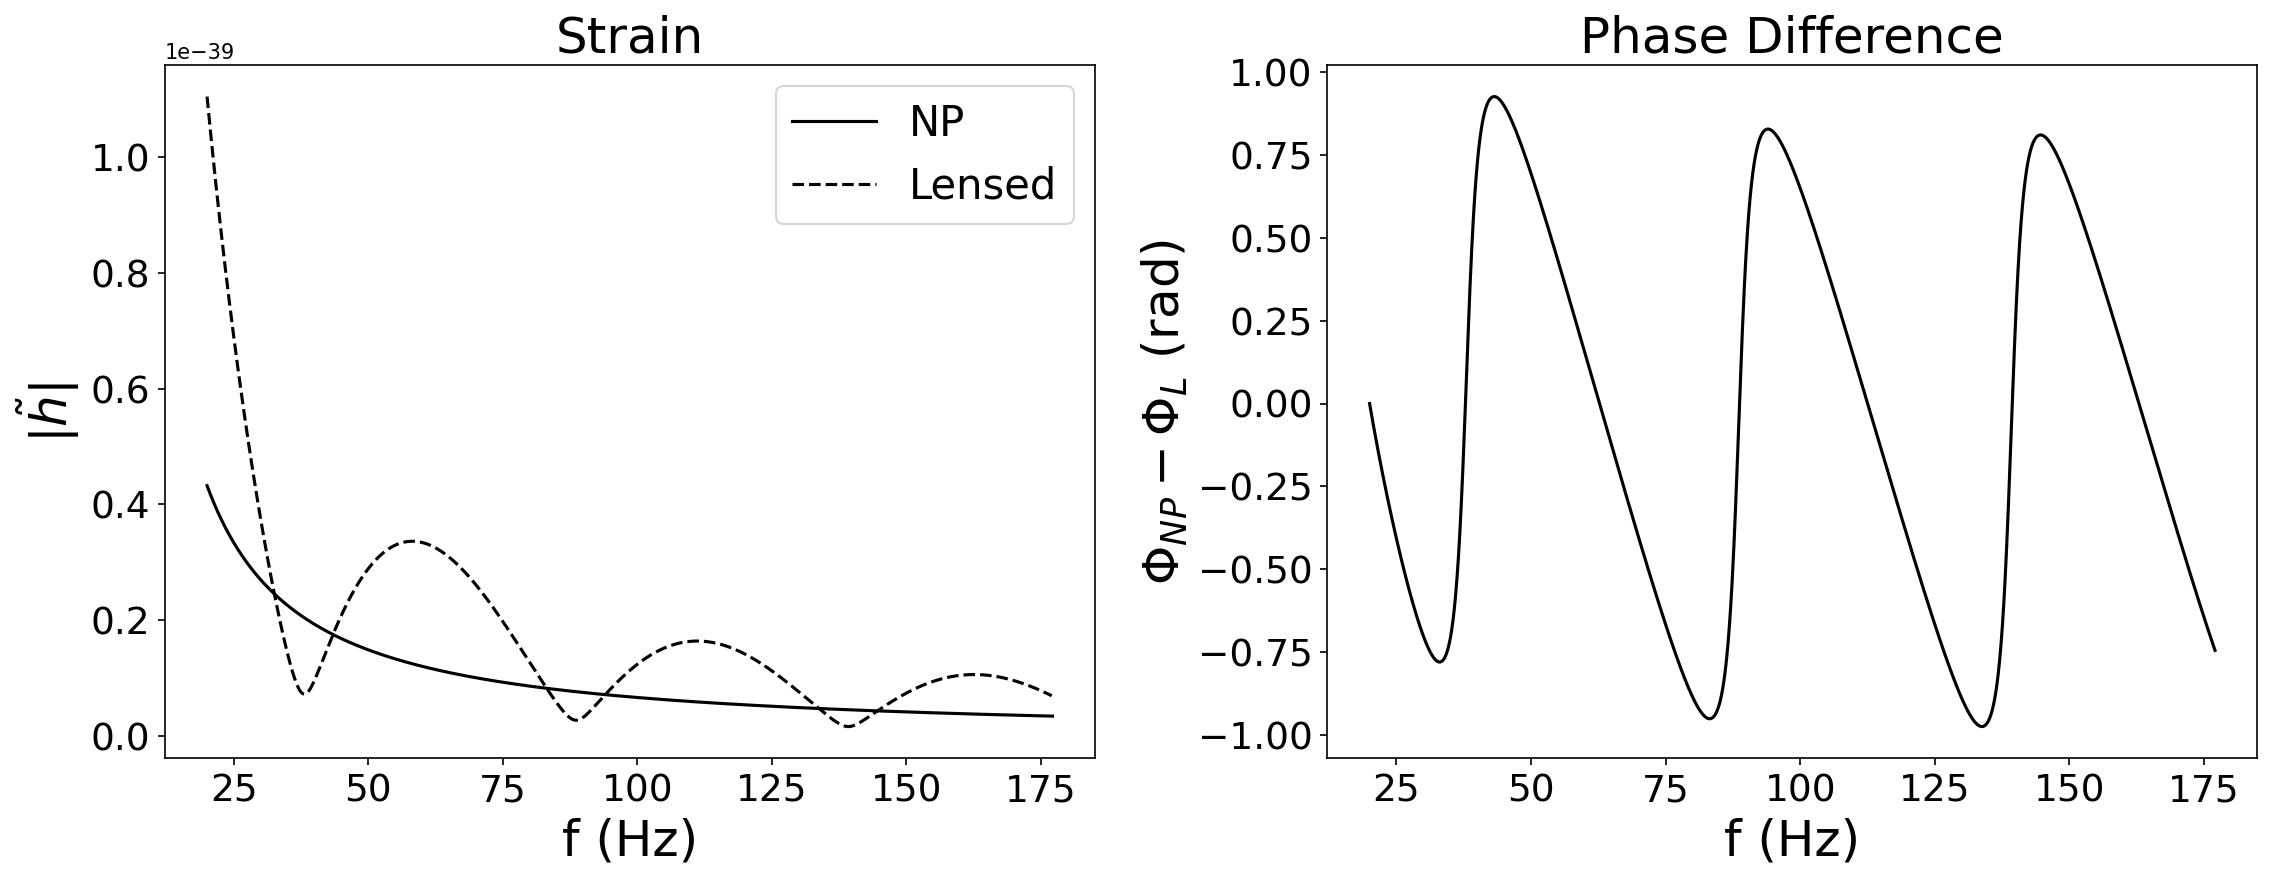

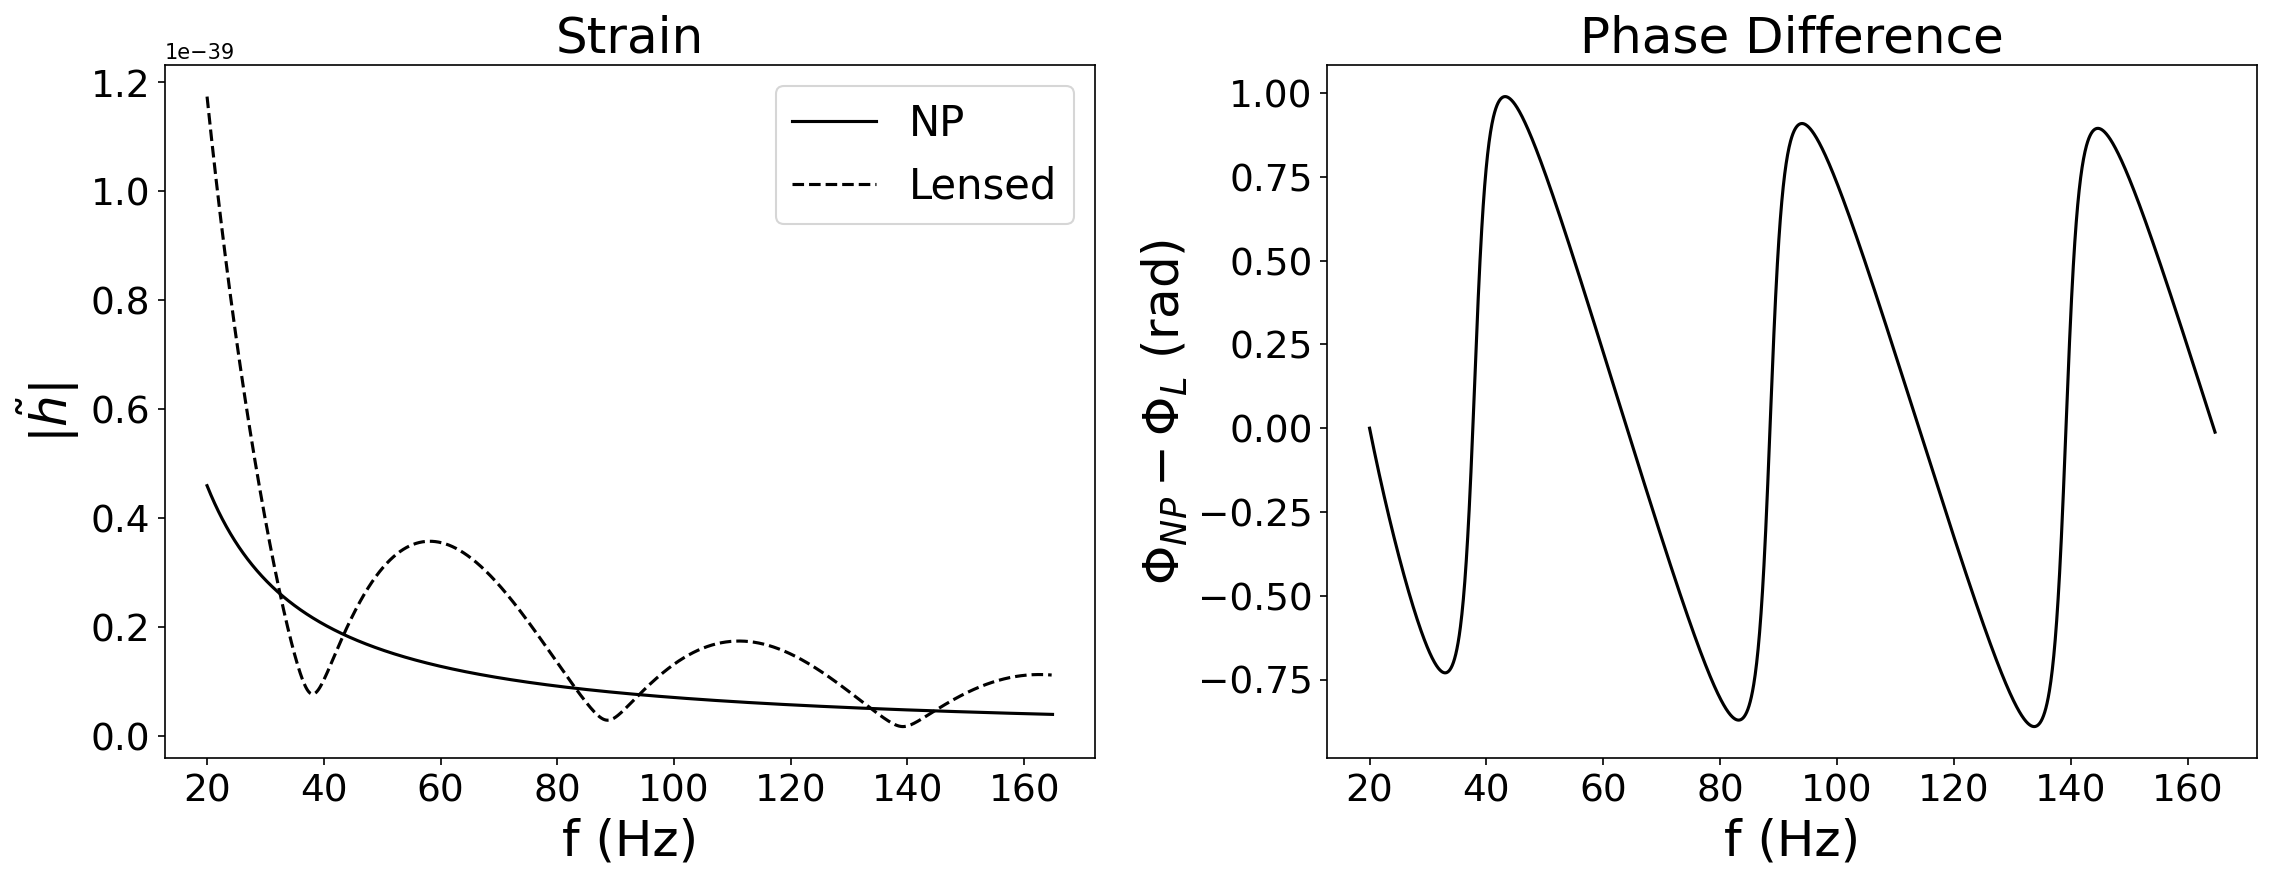

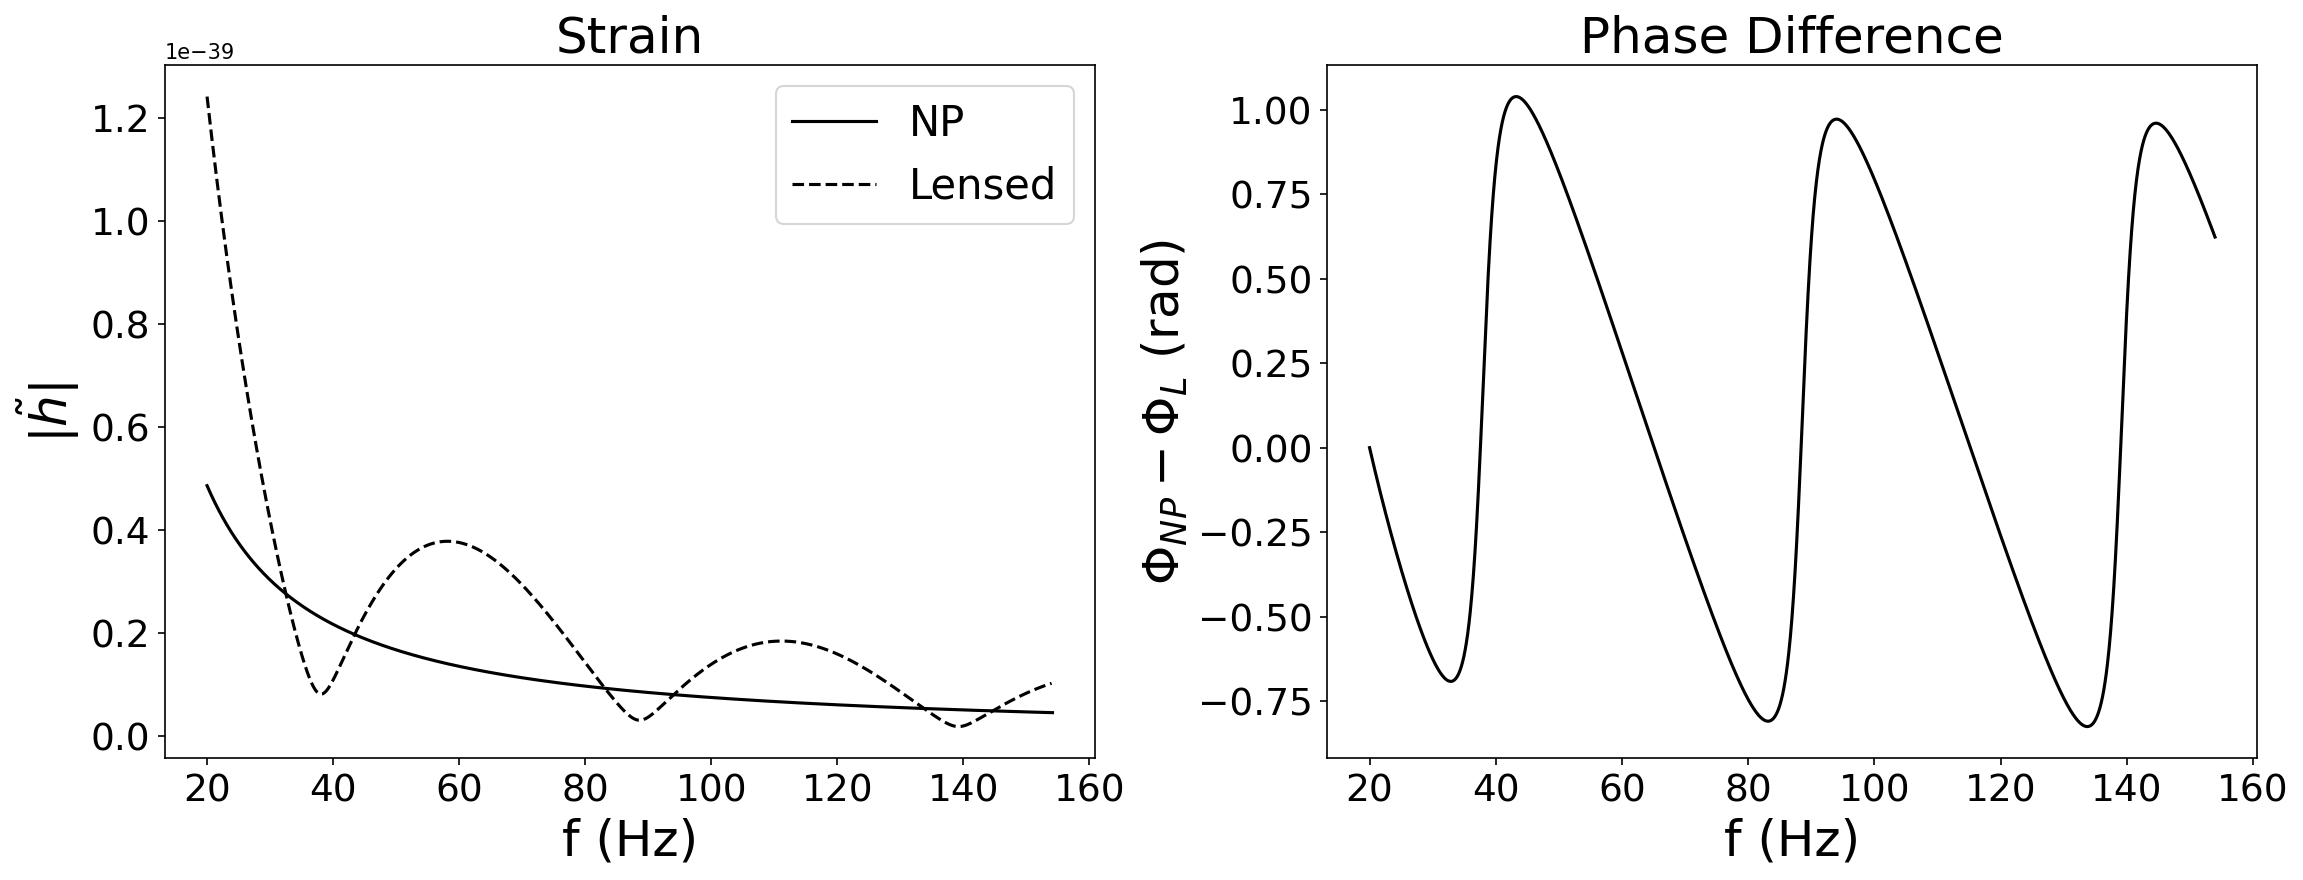

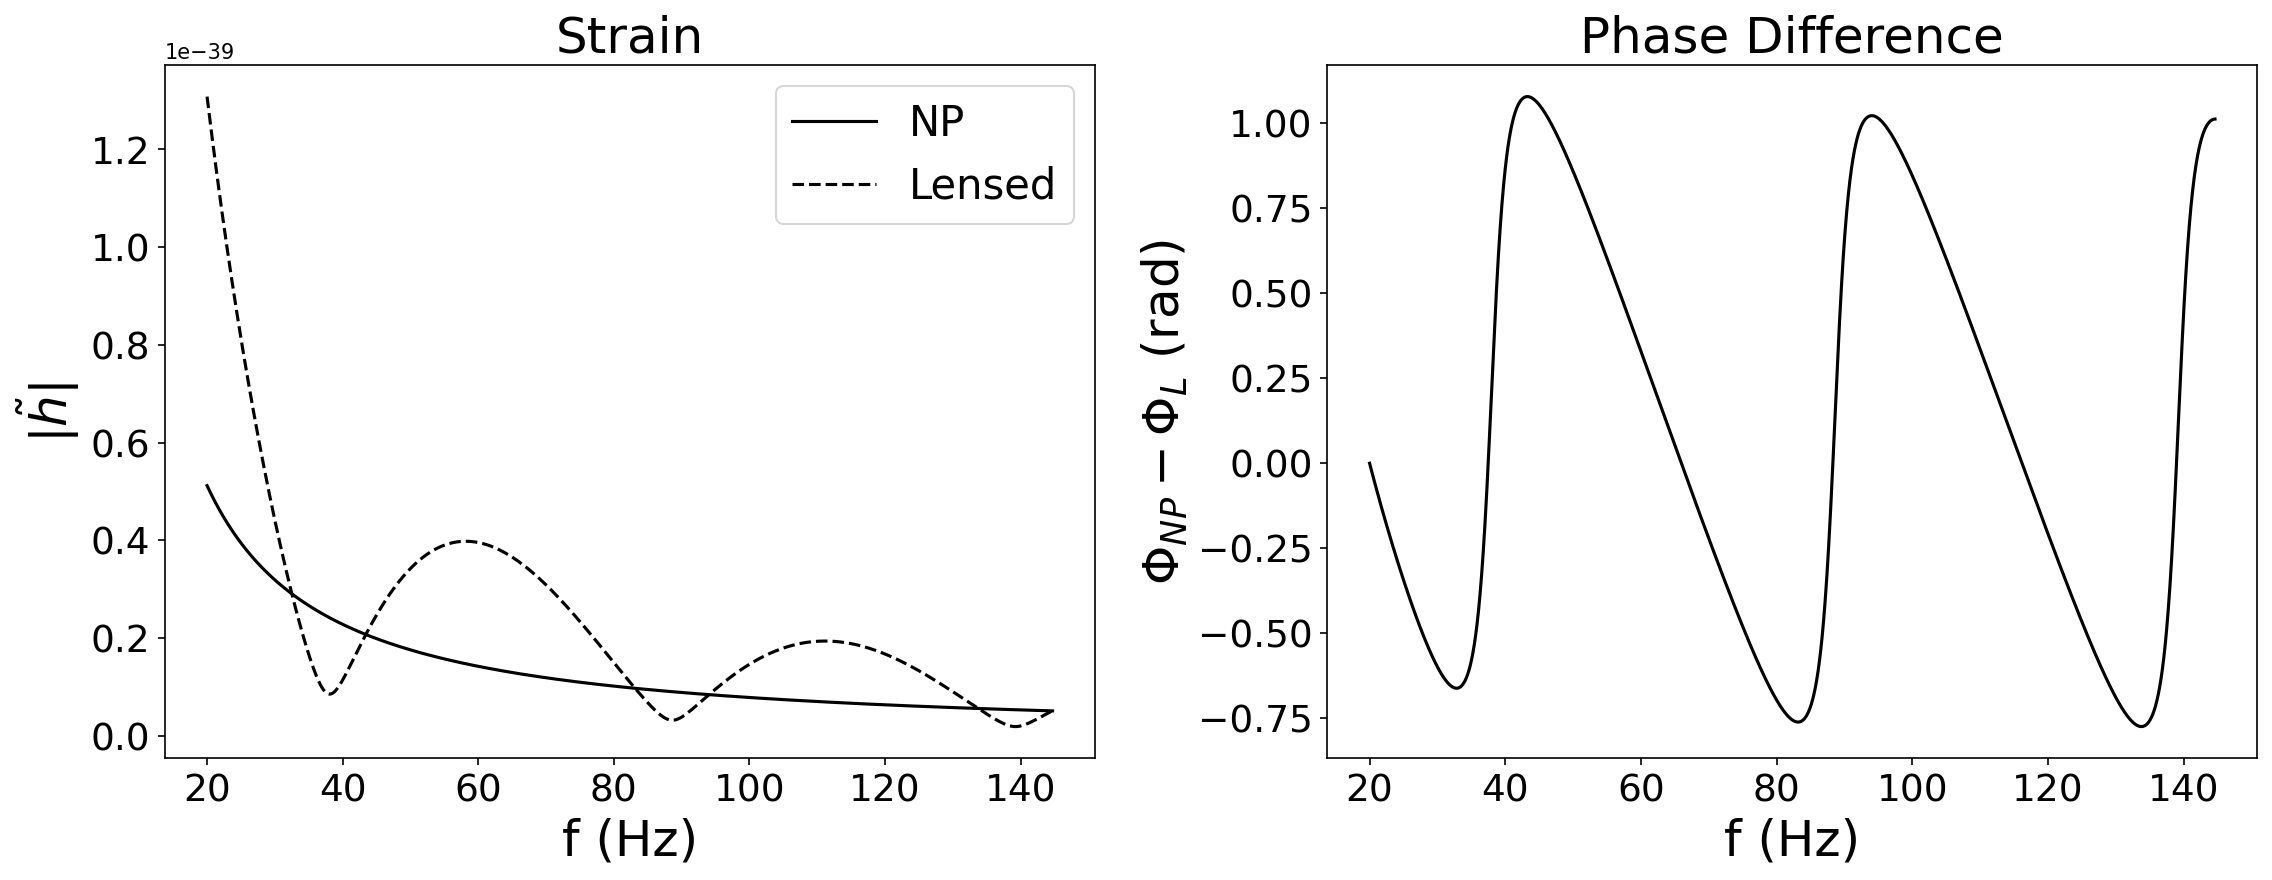

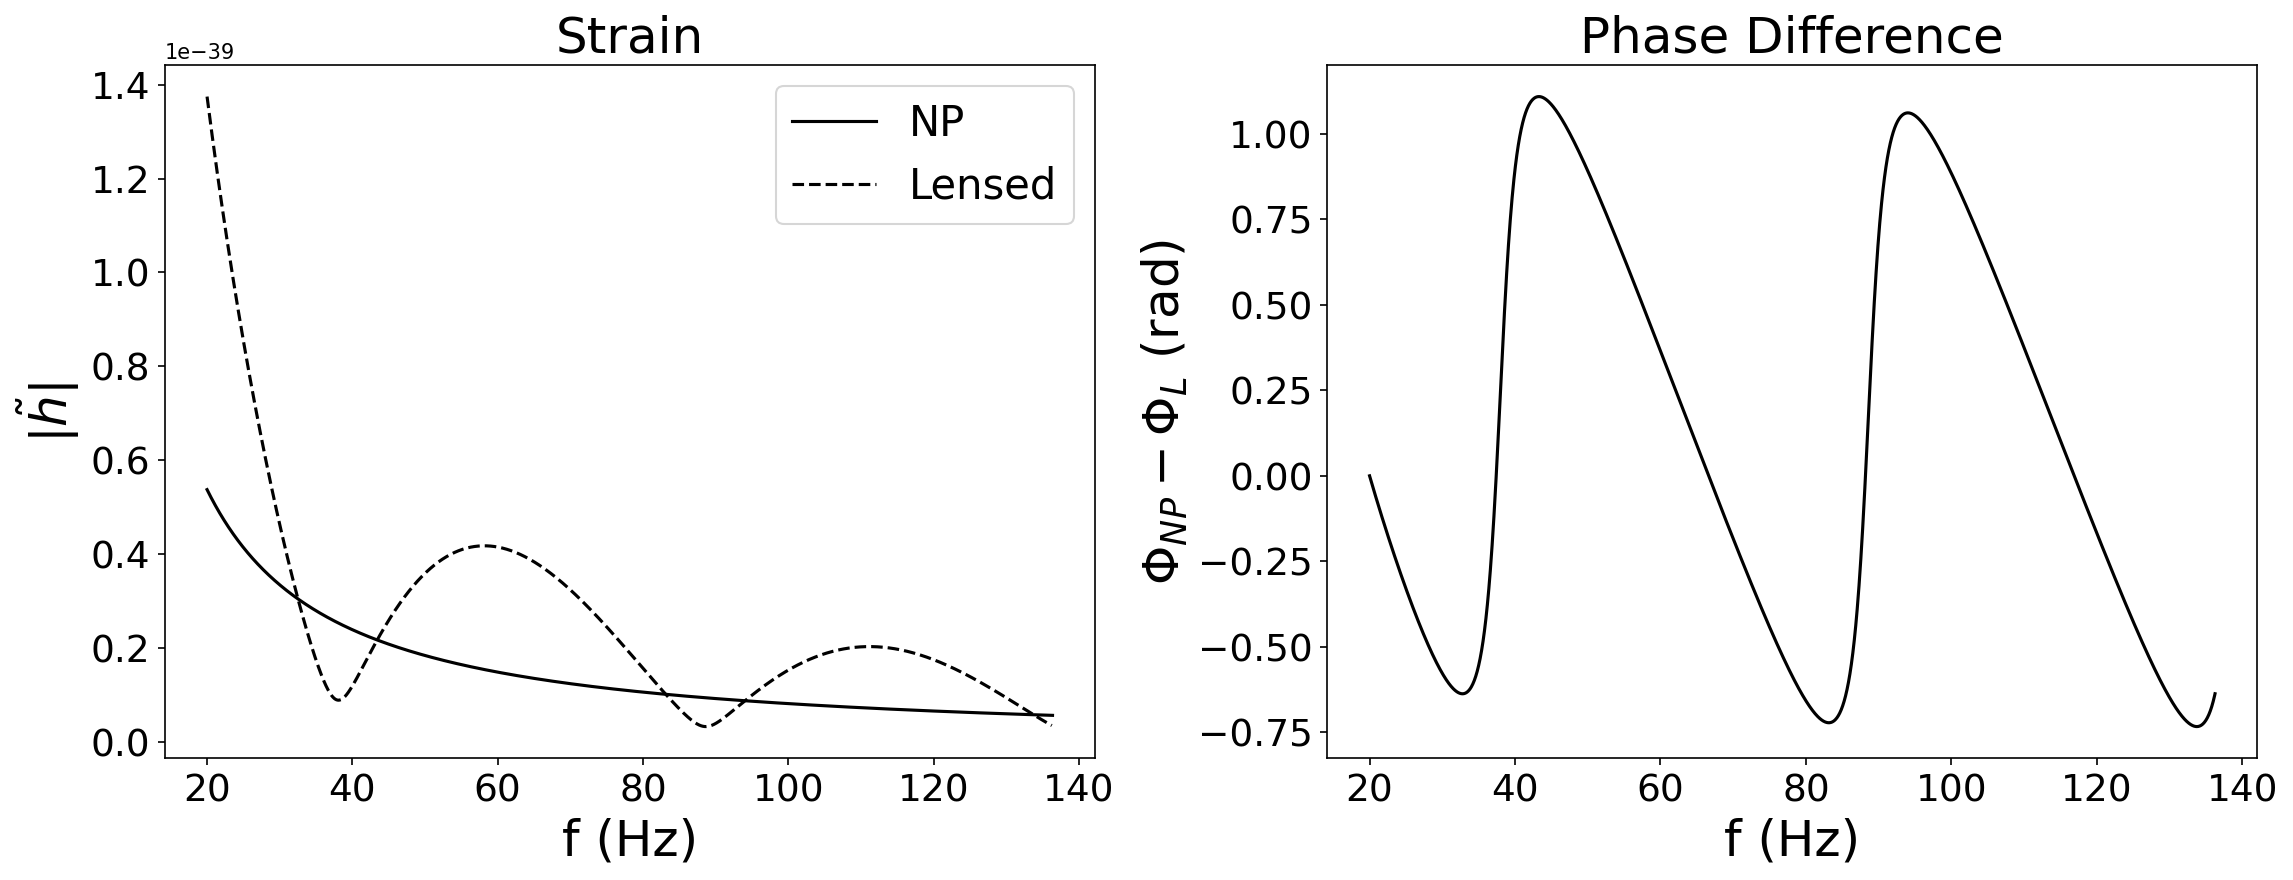

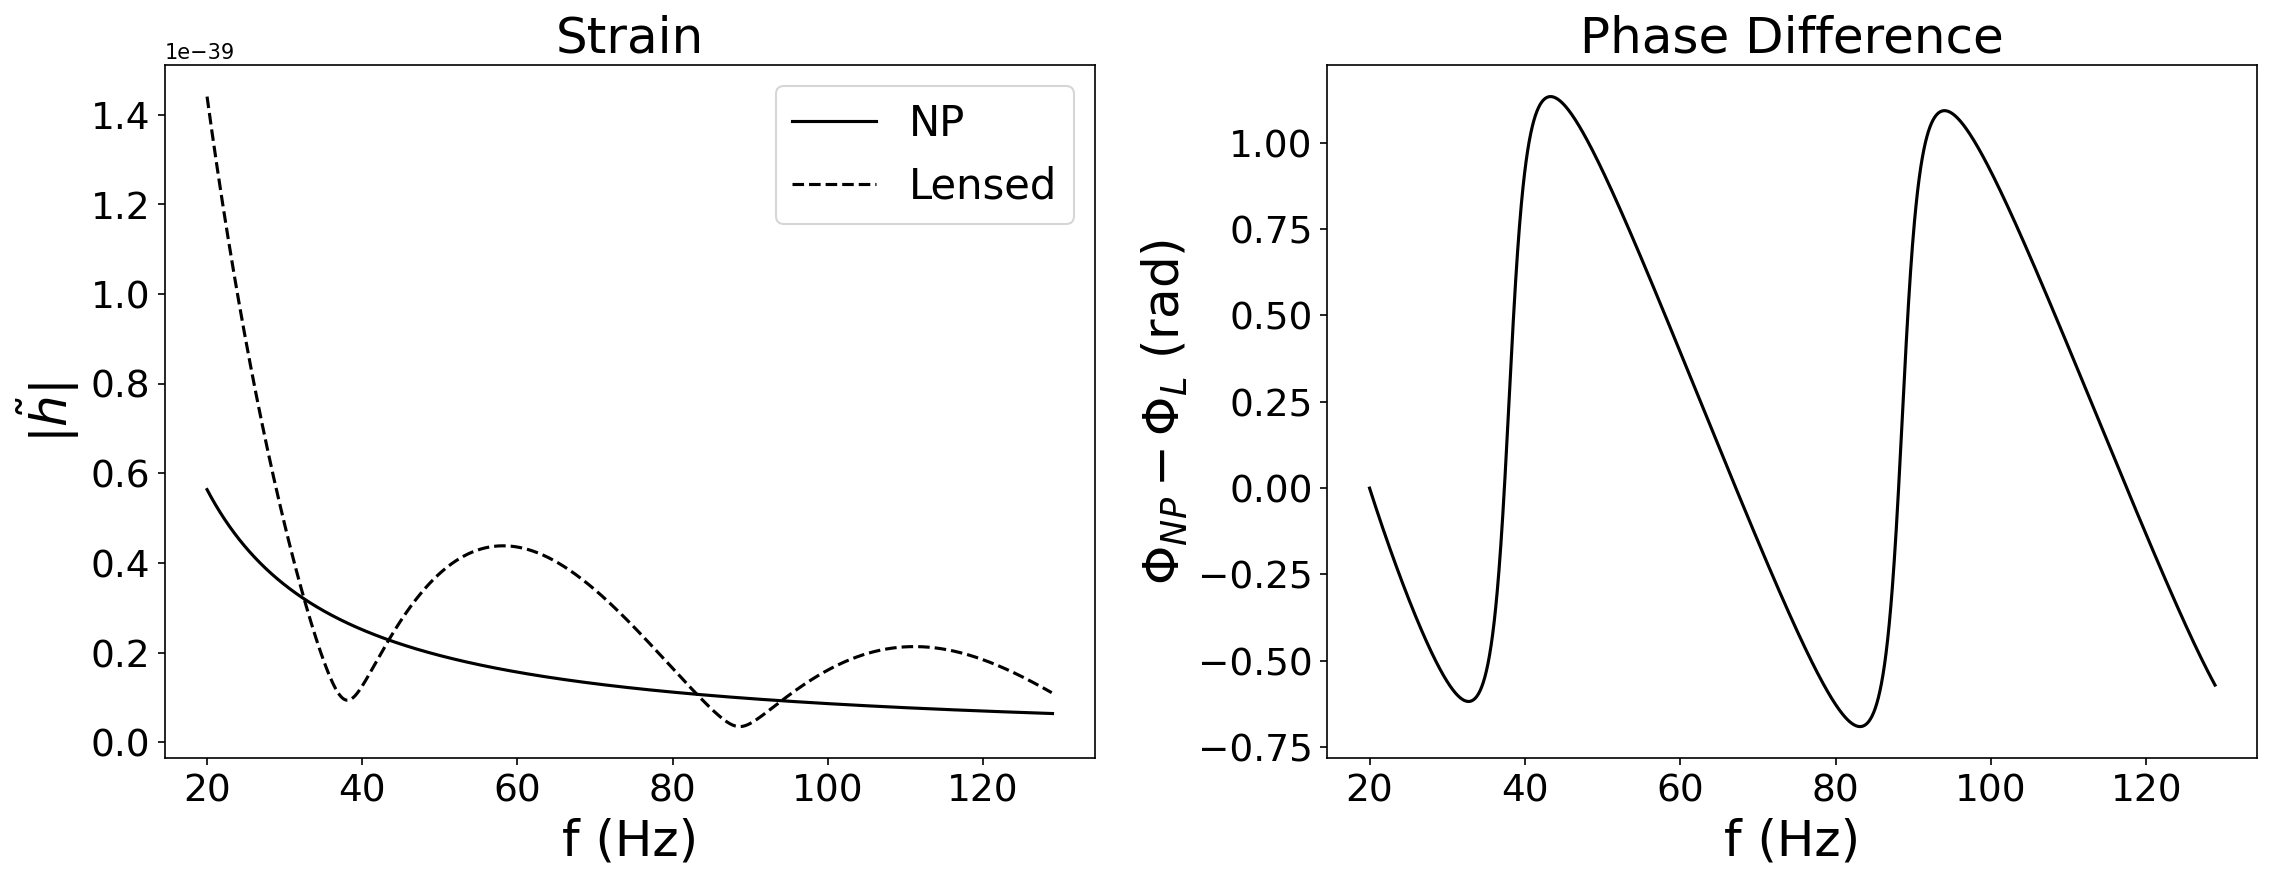

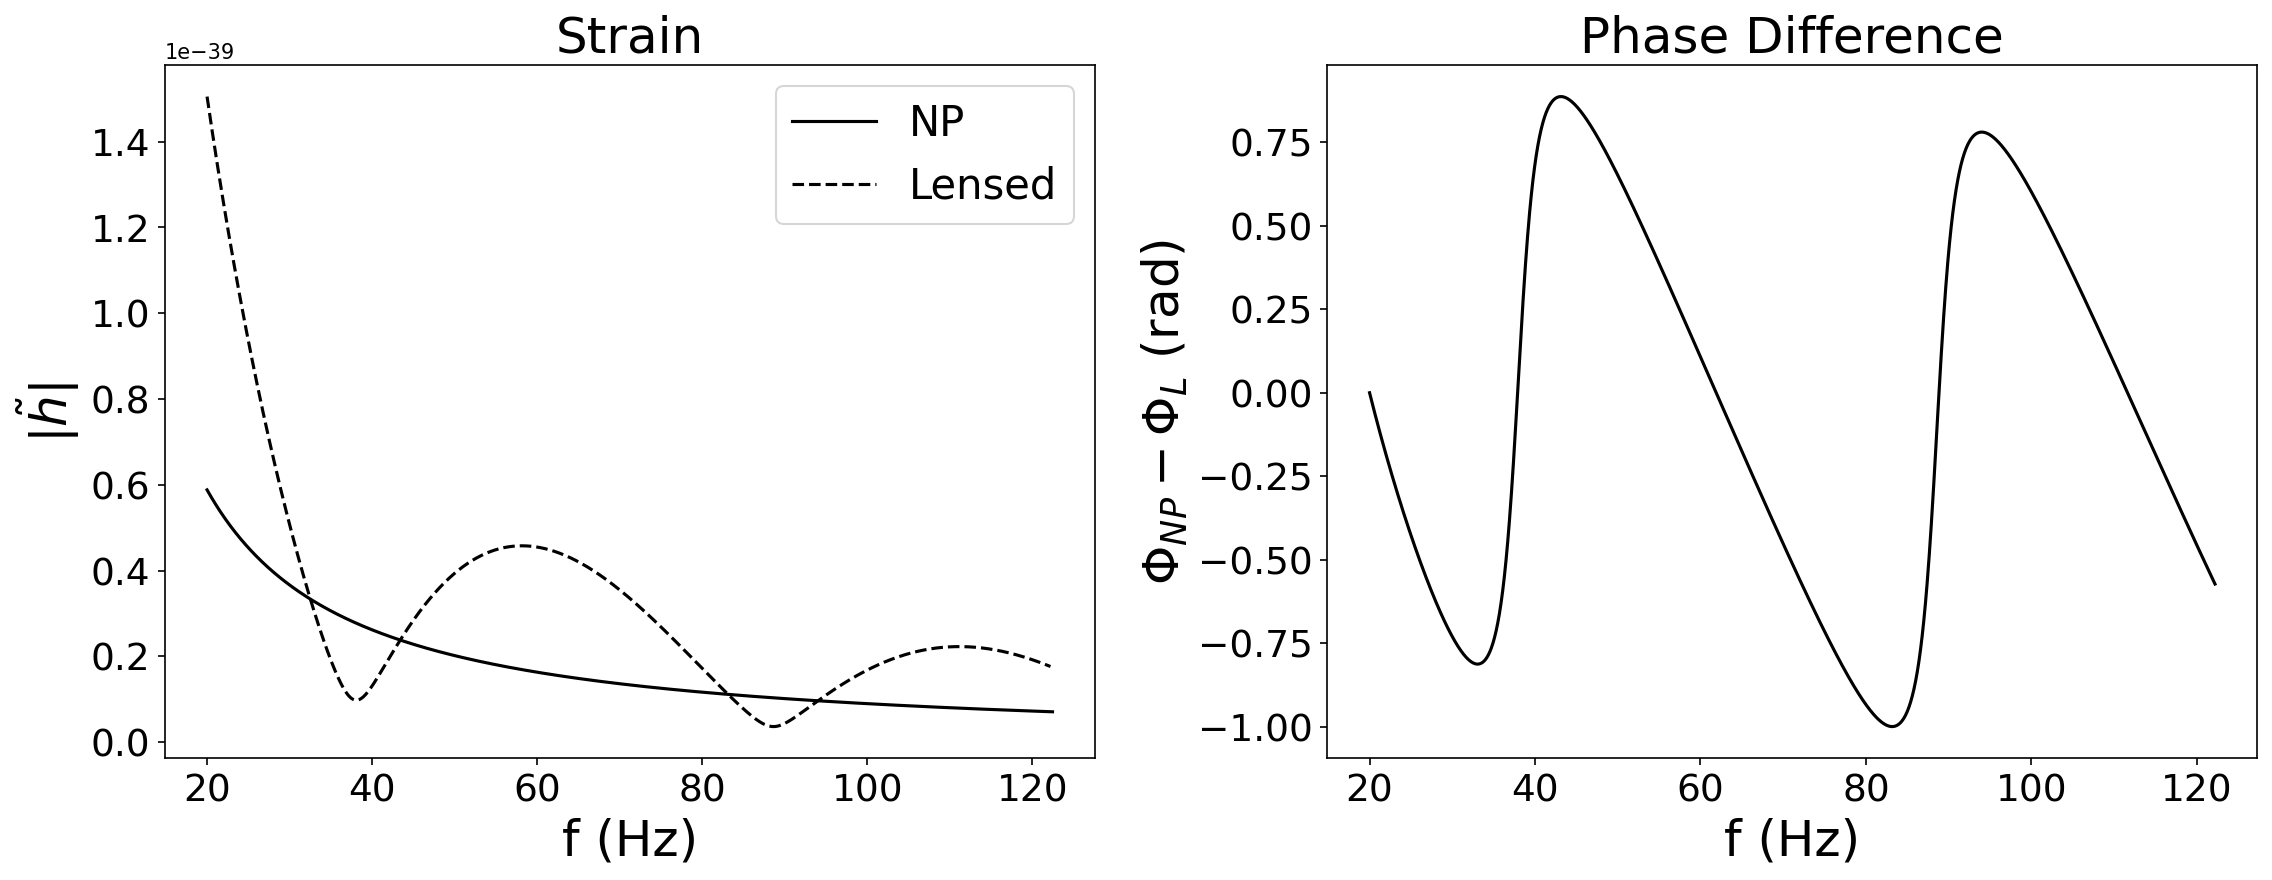

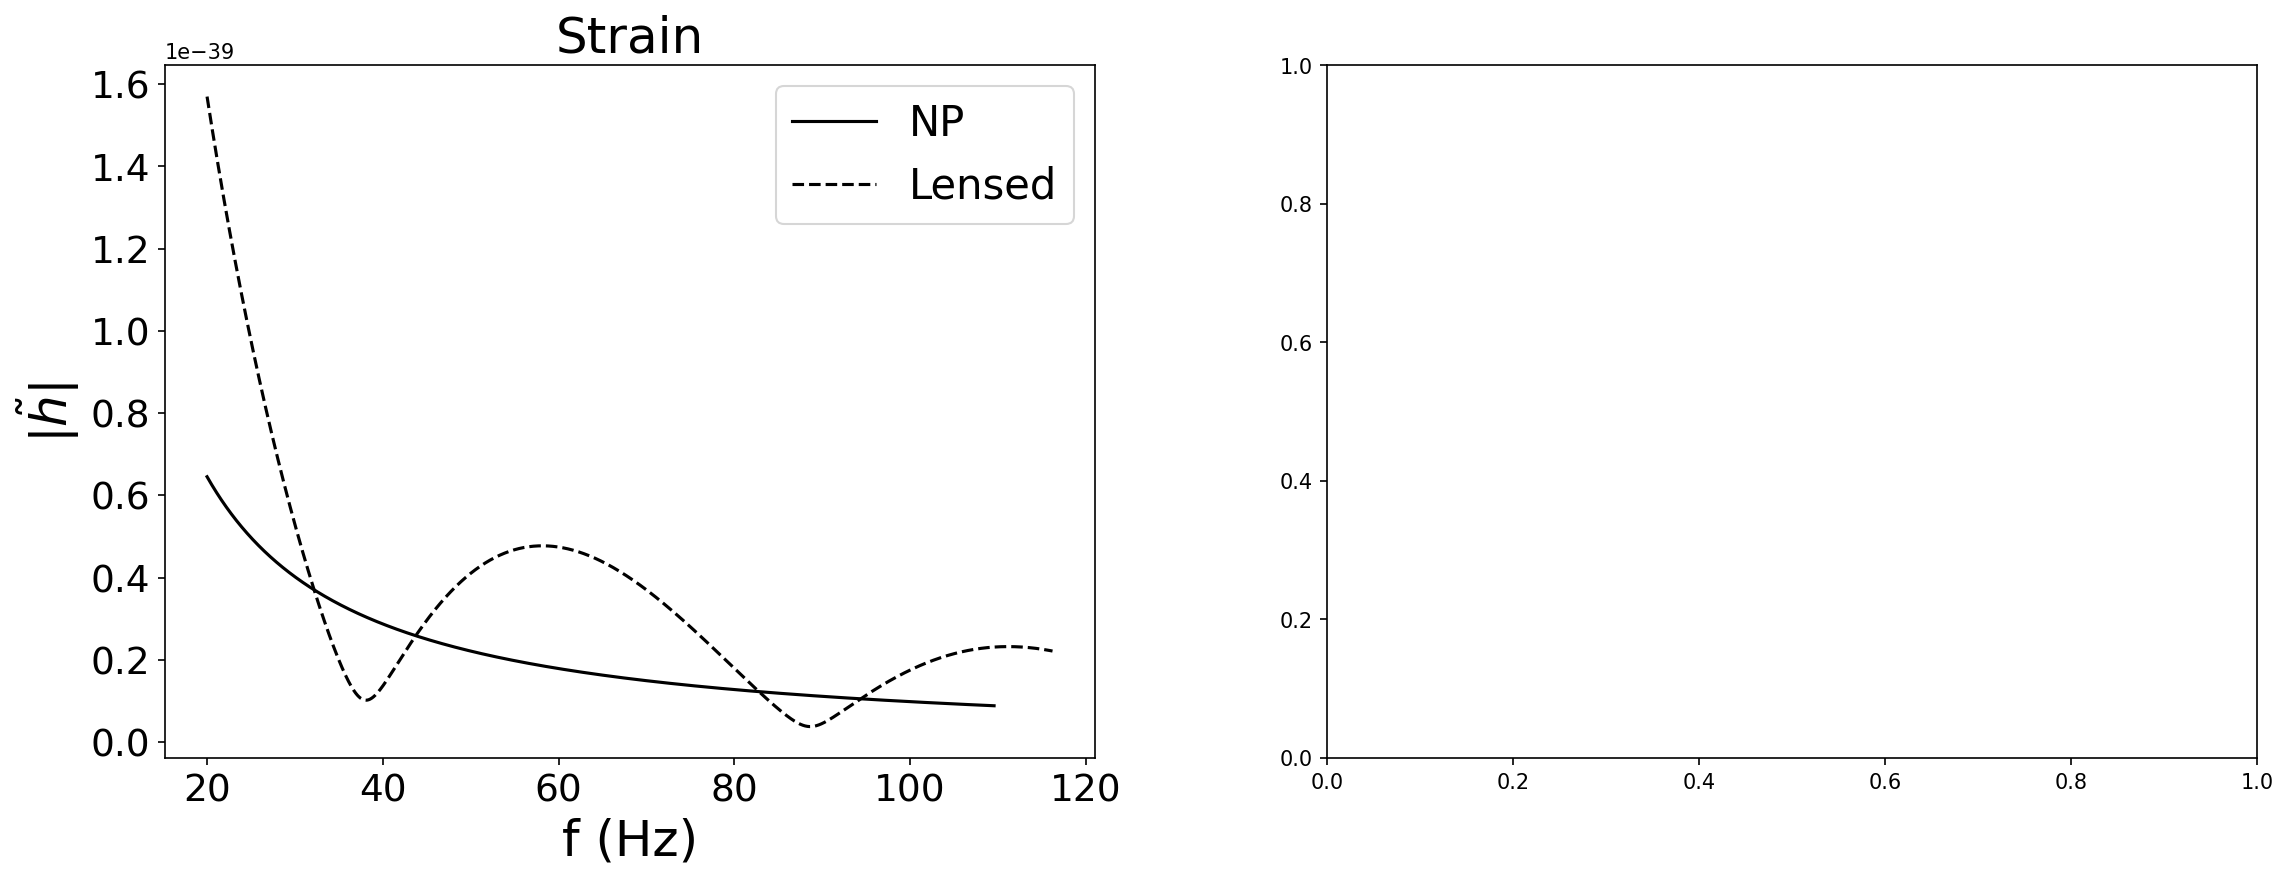

In [11]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

for i in range(len(optimized_mcz_dict_ML_2000["mcz_L_arr"])):
    lens_params["mcz"] = optimized_mcz_dict_ML_2000["mcz_L_arr"][i] * solar_mass
    NP_params["mcz"] = optimized_mcz_dict_ML_2000["optimized_ep_NP_L_mcz"][i] * solar_mass

    waveform_comparison_NP_L()